In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
# www.pnas.org/cgi/doi/10.1073/pnas.1617567114
# www.ncbi.nlm.nih.gov/pmc/articles/PMC6609542/

# ECD expansion

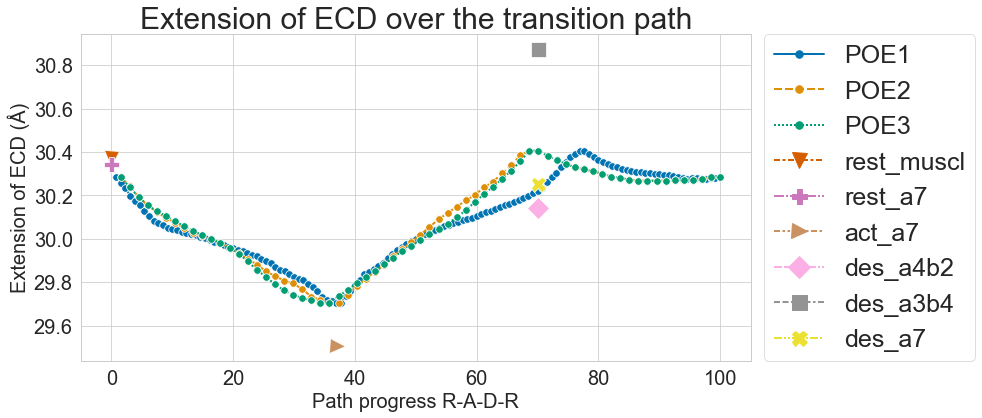

In [2]:
# ECD top and bottom spreads, defined as the distances between the COM of Cα for the full ECD 
# to the COM of the Cα of ECD of each subunit

blooming=pd.read_csv('ECD_expanding_results_25FEB.txt', header=None, sep='\t')

blooming.columns =['Name', 'Extension du domaine EC (Å)', 'Path progress', 'DB']

sns.set(style="whitegrid", rc = {'figure.figsize':(12,6)})
paper_rc = {'lines.linewidth':2, 'lines.markersize': 15}                  
sns.set_context("paper", rc = paper_rc) 
fig = sns.lineplot(data=blooming, x="Path progress", y="Extension du domaine EC (Å)",
                   hue="DB",palette='colorblind',style="DB", markers=['.','.','.','v', 'P', '>','D','s','X'])

#[',', '.', 'o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0,markerscale=1,
          fontsize=25, title_fontsize=25)
fig.axes.set_title("Extension of ECD over the transition path",fontsize=30)
fig.set_xlabel("Path progress R-A-D-R",fontsize=20)
fig.set_ylabel("Extension of ECD (Å)",fontsize=20)
fig.tick_params(labelsize=20)
#plt.axvline(37, color = 'r', linestyle='--')
#plt.axvline(70, color = 'g', linestyle='--')

plt.savefig('extensionECD.png',bbox_inches='tight')

# ECD-TMD torsion angle

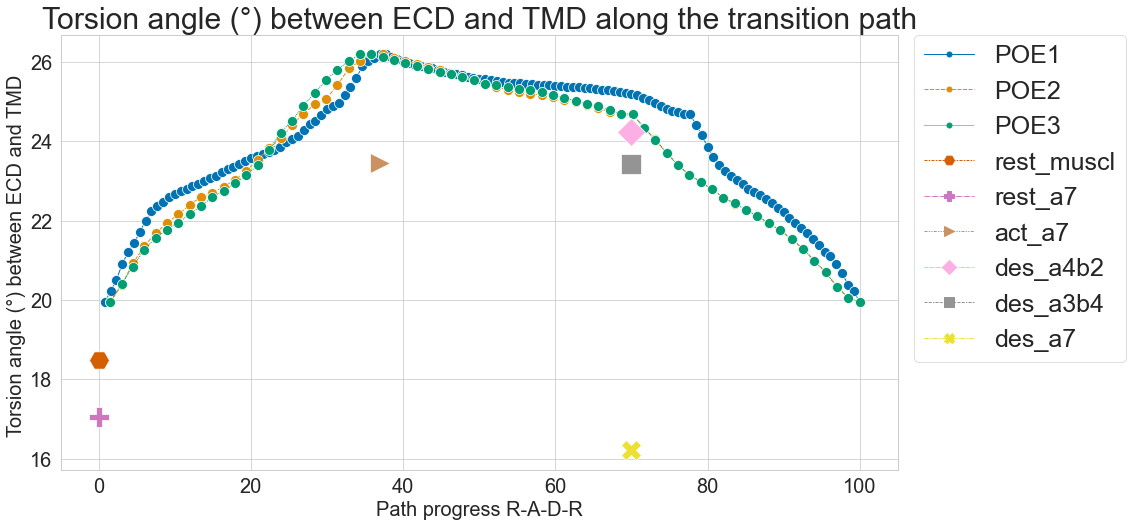

In [3]:
angle=pd.read_csv('ECD-TMDMXM4angle-1march.txt', header=None, sep='\t')

angle.columns =['Name', 'Torsion_angle', 'Path progress', 'DB']

sns.set(style="whitegrid", rc = {'figure.figsize':(15,8)})
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 20}                  
sns.set_context("paper", rc = paper_rc) 
fig = sns.lineplot(data=angle, x="Path progress", y="Torsion_angle",
                   hue="DB",palette='colorblind',style="DB", markers=['.','.','.','H', 'P', '>','D','s','X'])

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0,markerscale=0.5,
          fontsize=25, title_fontsize=25)
fig.axes.set_title("Torsion angle (°) between ECD and TMD along the transition path",fontsize=30)
fig.set_xlabel("Path progress R-A-D-R",fontsize=20)
fig.set_ylabel("Torsion angle (°) between ECD and TMD ",fontsize=20)
fig.tick_params(labelsize=20)

plt.savefig('ECD-TMDM4MX_ta.png',bbox_inches='tight')

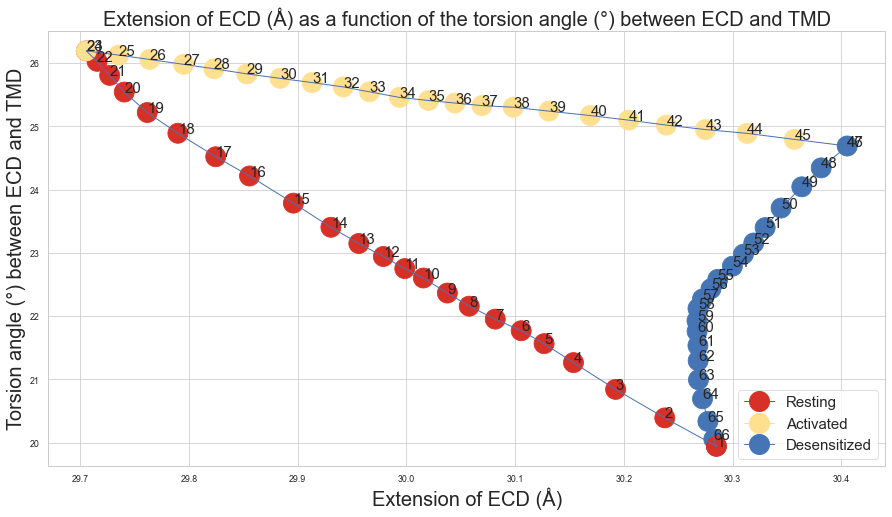

In [4]:
X = [num for num in angle.loc[angle['DB'] == 'POE3', 'Torsion_angle']]
Y = [num for num in blooming.loc[blooming['DB'] == 'POE3', 'Extension du domaine EC (Å)']]

correl = {'blooming':Y,'twisting':X}
df = pd.DataFrame(correl)

df['color'] = df.index
df.loc[0:23, 'color'] = "#d73027"
df.loc[23:46, 'color'] = "#fee090"
df.loc[46:, 'color'] = "#4575b4"
df.loc[66, "color"] = "#d73027"

df['name'] = df.index
df.loc[0:23, 'name'] = "resting"
df.loc[23:46, 'name'] = "activated"
df.loc[46:, 'name'] = "desensitized"
df.loc[66, "name"] = "resting"

scatter = plt.scatter(df.blooming,df.twisting, c=df.color)
plt.plot(df.blooming,df.twisting)

plt.title("Extension of ECD (Å) as a function of the torsion angle (°) between ECD and TMD",fontsize=20)
plt.ylabel("Torsion angle (°) between ECD and TMD",fontsize=20)
plt.xlabel("Extension of ECD (Å)",fontsize=20)

legend_elements = [Line2D([0], [0], marker='o', color='#d73027', label='Resting'),
                   Line2D([0], [0], marker='o', color='#fee090', label='Activated'),
                   Line2D([0], [0], marker='o', color='#4575b4', label='Desensitized')]

plt.legend(handles=legend_elements, loc='lower right',fontsize=15)

myList = list(range(1, 67))
for i, txt in enumerate(myList):
    plt.annotate(txt, (df.blooming[i], df.twisting[i]),fontsize=15)
    
plt.savefig('bloomvstwist.png',bbox_inches='tight')

# VOLUMES VS BLOOMING TWISTING

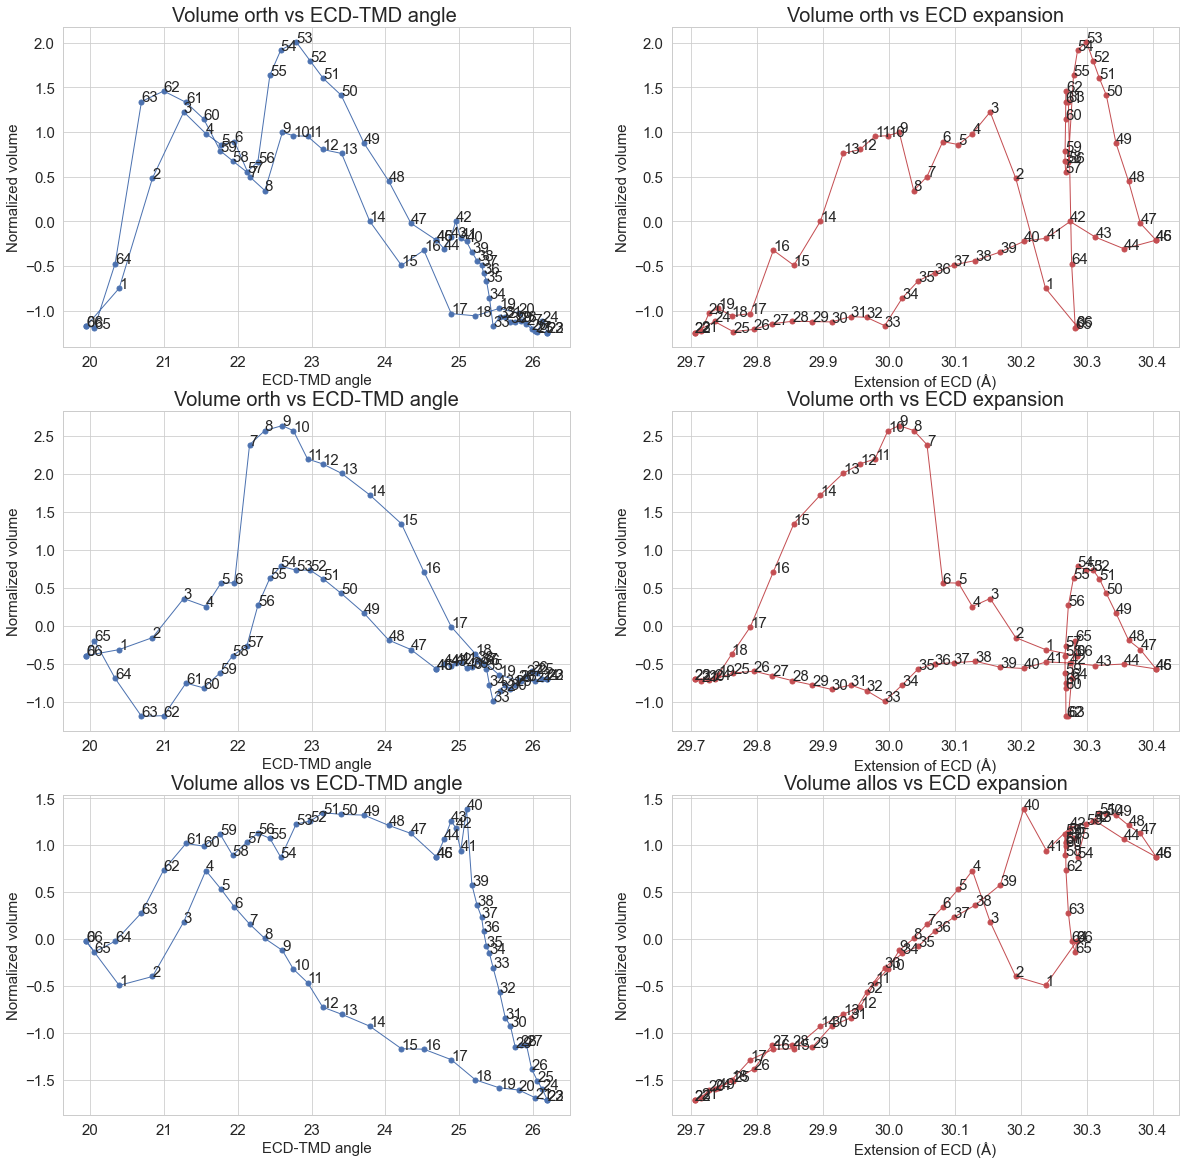

In [5]:
volumes = pd.read_csv('trj3rou6_VOL.txt', sep = "\t", index_col=0)

X_fl = [num for num in angle.loc[angle['DB'] == 'POE3', 'Torsion_angle']]
Y_fl = [num for num in blooming.loc[blooming['DB'] == 'POE3', 'Extension du domaine EC (Å)']] 
# orthosteric 192, 145
# allosteric 242

cavities = volumes[['cav_192','cav_145','cav_242']]
cavities = cavities.reset_index()

# normalize dividing by the sum of volumes over all the frames cavities are rows
cavities_norm = cavities.sub(cavities.mean(axis=0),axis=1)
cavities_norm = cavities_norm.div(cavities.std(axis=0),axis=1)

plt.rcParams["figure.figsize"] = (20,20)
fig, ((ax1, ax2), (ax3, ax4), (ax5,ax6)) = plt.subplots(3, 2)
#fig.suptitle('Horizontally stacked subplots')
ax1.plot(X_fl, cavities_norm['cav_192'], marker='o', color='b', markersize=5)
ax1.set_title("Volume orth vs ECD-TMD angle ",fontsize=20)
ax1.set_xlabel("ECD-TMD angle",fontsize=15)
ax1.set_ylabel("Normalized volume",fontsize=15)
ax1.tick_params(labelsize=15)

ax2.plot(Y_fl, cavities_norm['cav_192'], marker='o', color='r', markersize=5)
ax2.set_title("Volume orth vs ECD expansion",fontsize=20)
ax2.set_xlabel("Extension of ECD (Å)",fontsize=15)
ax2.set_ylabel("Normalized volume",fontsize=15)
ax2.tick_params(labelsize=15)

ax3.plot(X_fl, cavities_norm['cav_145'], marker='o', color='b', markersize=5)
ax3.set_title("Volume orth vs ECD-TMD angle",fontsize=20)
ax3.set_xlabel("ECD-TMD angle",fontsize=15)
ax3.set_ylabel("Normalized volume",fontsize=15)
ax3.tick_params(labelsize=15)

ax4.plot(Y_fl, cavities_norm['cav_145'], marker='o', color='r', markersize=5)
ax4.set_title("Volume orth vs ECD expansion",fontsize=20)
ax4.set_xlabel("Extension of ECD (Å)",fontsize=15)
ax4.set_ylabel("Normalized volume",fontsize=15)
ax4.tick_params(labelsize=15)

ax5.plot(X_fl, cavities_norm['cav_242'], marker='o', color='b', markersize=5)
ax5.set_title("Volume allos vs ECD-TMD angle",fontsize=20)
ax5.set_xlabel("ECD-TMD angle",fontsize=15)
ax5.set_ylabel("Normalized volume",fontsize=15)
ax5.tick_params(labelsize=15)

ax6.plot(Y_fl, cavities_norm['cav_242'], marker='o', color='r', markersize=5)
ax6.set_title("Volume allos vs ECD expansion",fontsize=20)
ax6.set_xlabel("Extension of ECD (Å)",fontsize=15)
ax6.set_ylabel("Normalized volume",fontsize=15)
ax6.tick_params(labelsize=15)

for i, txt in enumerate(list(cavities_norm.index)):
    ax1.annotate(txt, (X_fl[i], cavities_norm['cav_192'][i]),fontsize=15)
    ax2.annotate(txt, (Y_fl[i], cavities_norm['cav_192'][i]),fontsize=15)
    ax3.annotate(txt, (X_fl[i], cavities_norm['cav_145'][i]),fontsize=15)
    ax4.annotate(txt, (Y_fl[i], cavities_norm['cav_145'][i]),fontsize=15)
    ax5.annotate(txt, (X_fl[i], cavities_norm['cav_242'][i]),fontsize=15)
    ax6.annotate(txt, (Y_fl[i], cavities_norm['cav_242'][i]),fontsize=15)

# Principal Component Analysis

In [6]:
import numpy as np
import numpy.random as rnd
import pandas as pd
from numpy import array, mean, cov, std
from numpy.linalg import eig
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['angle', 'scatter']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [8]:
coords = pd.read_csv('PCA.data', header=None, sep='\t')
print("Shape of coords: ", coords.shape)
_mean = mean(coords, axis = 1)
print("Lenght of mean vector", len(_mean))
M = coords.T - _mean
M = M.T
print("Shape of M: ", M.shape)

#ICD M4 1-28  / 1-84
# TMD M4 29-62 / 85-186

#ICD M4 63-90 / 187-270
# TMD M4 91-124 / 271-372

#ECD 125-333 / 373-999
#TMD 334- 424 / 1000-1272
#MX 425-448 / 1273-1344

#ECD 449-657 / 1345-1971
#TMS 658-747 / 1972-2241
# MX 748- 772 / 2242-2316

#ICD M4 773-800 / 2317-2400
# TMD M4 801-832 / 2401-2496

#ECD 833-1040 / 2497-3120
#TMD 1041-1131 / 3121-3393
# MX 1132-1156 / 3394-3468

#ICD M4 1157-1183 / 3469-3549
# TMD M4 1184-1218 / 3550-3654

#ICD M4 1219-1245 / 3655-3735
# TMD M4 1246-1280 / 3736-3840

#ECD 1281-1488 / 3841-4464
#TMD 1489-1585 / 4465-4755
#MX 1586-1603 / 4756-4809

#ECD 1604-1811 / 4810-5433
#TMD 1812-1908 / 5434-5724
# MX 1909-1926 / 5725-5778


#TO REMOVE ICD and MX

#ICD M4 1-28  / 1-84
#ICD M4 63-90 / 187-270
#MX 425-448 / 1273-1344
# MX 748- 772 / 2242-2316
#ICD M4 773-800 / 2317-2400
# MX 1132-1156 / 3394-3468
#ICD M4 1157-1183 / 3469-3549
#ICD M4 1219-1245 / 3655-3735
#MX 1586-1603 / 4756-4809
# MX 1909-1926 / 5725-5778

M2 = M.copy()

M2.iloc[:84] = 0 # ICD M4 1-84
M2.iloc[186:270] = 0 # ICD M4 187-270
M2.iloc[1272:1344] = 0 # MX 1273-1344
M2.iloc[2241:2316] = 0 # MX 2242-2316
M2.iloc[2316:2400] = 0 # ICD M4 2317-2400
M2.iloc[3393:3468] = 0 # MX 3394-3468
M2.iloc[3468:3549] = 0 # ICD M4 3469-3549
M2.iloc[3654:3735] = 0 # ICD M4 3655-3735
M2.iloc[4755:4809] = 0 # MX 4756-4809
M2.iloc[5724:5778] = 0 # MX 5725-5778

MECD = M2.copy()

# REMOVE ICD AND TMD-MX

#ICD M4 1-28  / 1-84
# TMD M4 29-62 / 85-186
#ICD M4 63-90 / 187-270
# TMD M4 91-124 / 271-372
#TMD 334- 424 / 1000-1272
#MX 425-448 / 1273-1344
#TMS 658-747 / 1972-2241
# MX 748- 772 / 2242-2316
#ICD M4 773-800 / 2317-2400
# TMD M4 801-832 / 2401-2496
#TMD 1041-1131 / 3121-3393
# MX 1132-1156 / 3394-3468
#ICD M4 1157-1183 / 3469-3549
# TMD M4 1184-1218 / 3550-3654
#ICD M4 1219-1245 / 3655-3735
# TMD M4 1246-1280 / 3736-3840
#TMD 1489-1585 / 4465-4755
#MX 1586-1603 / 4756-4809
#TMD 1812-1908 / 5434-5724
# MX 1909-1926 / 5725-5778

MECD.iloc[:84] = 0 # ICD M4 1-84
MECD.iloc[84:186] = 0 # TMD M4 85-186
MECD.iloc[186:270] = 0 # ICD M4 187-270
MECD.iloc[270:372] = 0 # TMD M4 271-372
MECD.iloc[999:1272] = 0 # TMD 1000-1272
MECD.iloc[1272:1344] = 0 # MX 1273-1344
MECD.iloc[1971:2241] = 0 #TMS 1972-2241
MECD.iloc[2241:2316] = 0 # MX 2242-2316
MECD.iloc[2316:2400] = 0 # ICD M4 2317-2400
MECD.iloc[2400:2496] = 0 # TMD M4 2401-2496
MECD.iloc[3120:3393] = 0 #TMD 3121-3393
MECD.iloc[3393:3468] = 0 # MX 3394-3468
MECD.iloc[3468:3549] = 0 # ICD M4 3469-3549
MECD.iloc[3549:3654] = 0 # TMD M4 3550-3654
MECD.iloc[3654:3735] = 0 # ICD M4 3655-3735
MECD.iloc[3735:3840] = 0 # TMD M4 3736-3840
MECD.iloc[4464:4755] = 0 # TMD 4465-4755
MECD.iloc[4755:4809] = 0 # MX 4756-4809
MECD.iloc[5433:5724] = 0 #TMD 5434-5724
MECD.iloc[5724:5778] = 0 # MX 5725-5778

MTMD = M2.copy()

# TO REMOVE ECD AND MX

#ICD M4 1-28  / 1-84
#ICD M4 63-90 / 187-270
#ECD 125-333 / 373-999
#MX 425-448 / 1273-1344
#ECD 449-657 / 1345-1971
# MX 748- 772 / 2242-2316
# ICD M4 773-800 / 2317-2400
# ECD 833-1040 / 2497-3120
# MX 1132-1156 / 3394-3468
#ICD M4 1157-1183 / 3469-3549
#ICD M4 1219-1245 / 3655-3735
#ECD 1281-1488 / 3841-4464
#MX 1586-1603 / 4756-4809
#ECD 1604-1811 / 4810-5433
# MX 1909-1926 / 5725-5778


MTMD.iloc[:84] = 0 # ICD M4 1-84
MTMD.iloc[186:270] = 0 # ICD M4 187-270
MTMD.iloc[372:999] = 0 # ECD 373-999
MTMD.iloc[1272:1344] = 0 # MX 1273-1344
MTMD.iloc[1344:1971] = 0 #ECD 1345-1971
MTMD.iloc[2241:2316] = 0 # MX 2242-2316
MTMD.iloc[2316:2400] = 0 # ICD M4 2317-2400
MTMD.iloc[2496:3120] = 0 #ECD 2497-3120
MTMD.iloc[3393:3468] = 0 # MX 3394-3468
MTMD.iloc[3468:3549] = 0 # ICD M4 3469-3549
MTMD.iloc[3654:3735] = 0 # ICD M4 3655-3735
MTMD.iloc[3840:4464] = 0 #ECD 3841-4464
MTMD.iloc[4755:4809] = 0 # MX 4756-4809
MTMD.iloc[4809:5433] = 0 # ECD 4810-5433
MTMD.iloc[5724:5778] = 0 # MX 5725-5778

MECD.to_csv("ECD_PCA_CA.csv", index=False)
MTMD.to_csv("TMD_PCA_CA.csv", index=False)
coords.to_csv("coords_PCA_CA.csv", index=False)
                   
len_MECD = len(MECD[(MECD != 0).all(axis=1)])
len_MTMD = len(MTMD[(MTMD != 0).all(axis=1)])

print(len_MECD)
print(len_MTMD)

Shape of coords:  (5778, 68)
Lenght of mean vector 5778
Shape of M:  (5778, 68)
3126
1908


In [9]:
#Vstep = 1/s · MT M and Vdescr = 1/s · MMT, s = number of frames
s=67
Vstep = np.dot(M.T, M)/s
Vdescrp = np.dot(M, M.T)/s
print("Vstep shape: ", Vstep.shape)
print("Vdescrp shape: ", Vdescrp.shape)

Vstep shape:  (68, 68)
Vdescrp shape:  (5778, 5778)


In [8]:
# Vdescrp   Vdescr ·(M·vj)=λj ·(M·vj)
# Thus, M · vj is collinear to an eigenvector of Vdescr, that we will call Nj
# Nj = (sλj)−1/2 · M · vj.
# N = eigenvectors of Vdescrp using the eigen vectors and eigen values of Vstep
#Vdescr·N =λj·N

In [10]:
#Vdescrp
# get eigen vectors and eigen values
# l = eigen values v = eigen vector in 
l, v = np.linalg.eig(Vdescrp)
print("eigen values shape: ", l.shape)
print("eigen vectors shape: ", v.shape)

# sort eigen vectors by eigen values
indices = np.arange(0,len(l), 1)
indices = ([x for _,x in sorted(zip(l, indices))])[::-1]
l = l[indices]
v = v[:,indices]

#Vstep
print("sorted eigen values: ", l[:3].real)

# explained variance
sum_eig_val = np.sum(l.real)
explained_variance = l.real/ sum_eig_val
print("explained variance: ", explained_variance[:3])

# cummulative variance
cumulative_variance = np.cumsum(explained_variance)
print("cummulative variance: ", cumulative_variance[:3])

### PCA
v = (v.T[:][:3]).T.real
print("matrix with coordinates shape: ", M.shape)
print("matrix with weights shape: ",v.shape)

# tranform data to principal components
Mdotv = (np.dot(M.T,v))
print("transformed data shape: ", Mdotv.shape)

# tranform data to principal components ECD
MECDdotv = (np.dot(MECD.T,v))
print("transformed data shape: ", Mdotv.shape)

# tranform data to principal components TMD
MTMDdotv = (np.dot(MTMD.T,v))
print("transformed data shape: ", Mdotv.shape)

eigen values shape:  (5778,)
eigen vectors shape:  (5778, 5778)
sorted eigen values:  [3174.20553871  926.35959323   59.94963099]
explained variance:  [0.74696675 0.21799465 0.01410759]
cummulative variance:  [0.74696675 0.9649614  0.97906899]
matrix with coordinates shape:  (5778, 68)
matrix with weights shape:  (5778, 3)
transformed data shape:  (68, 3)
transformed data shape:  (68, 3)
transformed data shape:  (68, 3)


In [11]:
#Vstep
# get eigen vectors and eigen values
# l = eigen values v = eigen vector in 
l_Vstep, v_Vstep = np.linalg.eig(Vstep)
print("eigen values shape: ", l_Vstep.shape)
print("eigen vectors shape: ", v_Vstep.shape)

# sort eigen vectors by eigen values
indices = np.arange(0,len(l_Vstep), 1)
indices = ([x for _,x in sorted(zip(l_Vstep, indices))])[::-1]
l_Vstep = l_Vstep[indices]
v_Vstep = v_Vstep[:,indices]

#Vstep
print("sorted eigen values: ", l_Vstep[:3].real)

# explained variance
sum_eig_val = np.sum(l_Vstep.real)
explained_variance = l_Vstep.real/ sum_eig_val
print("explained variance: ", explained_variance[:3])

# cummulative variance
cumulative_variance = np.cumsum(explained_variance)
print("cummulative variance: ", cumulative_variance[:3])

### PCA
v_Vstep = (v_Vstep.T[:][:3]).T.real

print("matrix with coordinates shape: ", M.shape)
print("matrix with weights shape: ",v_Vstep.shape)

# tranform data to principal components
Mdotv_Vstep = (np.dot(M,v_Vstep))
print("transformed data shape: ", Mdotv_Vstep.shape)

# tranform data to principal components ECD
MECDdotv_Vstep = (np.dot(MECD,v_Vstep))
print("transformed data shape: ", MECDdotv_Vstep.shape)

# tranform data to principal components TMD
MTMDdotv_Vstep = (np.dot(MTMD,v_Vstep))
print("transformed data shape: ", MTMDdotv_Vstep.shape)

eigen values shape:  (68,)
eigen vectors shape:  (68, 68)
sorted eigen values:  [3174.20553871  926.35959323   59.94963099]
explained variance:  [0.74696675 0.21799465 0.01410759]
cummulative variance:  [0.74696675 0.9649614  0.97906899]
matrix with coordinates shape:  (5778, 68)
matrix with weights shape:  (68, 3)
transformed data shape:  (5778, 3)
transformed data shape:  (5778, 3)
transformed data shape:  (5778, 3)


In [18]:
### PCA
MPCA = pd.DataFrame(Mdotv)
MECDPCA = pd.DataFrame(MECDdotv)
MTMDPCA = pd.DataFrame(MTMDdotv)
MPCA = MPCA/np.sqrt(5778/3)
MPCA = MPCA.round(3)
MPCA.columns =['x', 'y', 'z']
MPCA['index'] = MPCA.index
MPCA.loc[0:24, 'index'] = "Resting"
MPCA.loc[24:46, 'index'] = "Active"
MPCA.loc[46:, 'index'] = "Desensitized"
MPCA.loc[67, "index"] = "Resting"

MECDPCA = MECDPCA/np.sqrt(len_MECD/3)
MECDPCA = MECDPCA.round(3)
MECDPCA.columns =['x', 'y', 'z']
MECDPCA['index'] = MECDPCA.index
MECDPCA.loc[0:24, 'index'] = "Resting"
MECDPCA.loc[24:46, 'index'] = "Active"
MECDPCA.loc[46:, 'index'] = "Desensitized"
MECDPCA.loc[67, "index"] = "Resting"

MTMDPCA = MTMDPCA/np.sqrt(len_MTMD/3)
MTMDPCA = MTMDPCA.round(3)
MTMDPCA.columns =['x', 'y', 'z']
MTMDPCA['index'] = MTMDPCA.index
MTMDPCA.loc[0:24, 'index'] = "Resting"
MTMDPCA.loc[24:46, 'index'] = "Active"
MTMDPCA.loc[46:, 'index'] = "Desensitized"
MTMDPCA.loc[67, "index"] = "Resting"


concatenated = pd.concat([MPCA.assign(dataset='MPCA'),
                          MECDPCA.assign(dataset='MECDPCA'), MTMDPCA.assign(dataset='MTMDPCA')])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator


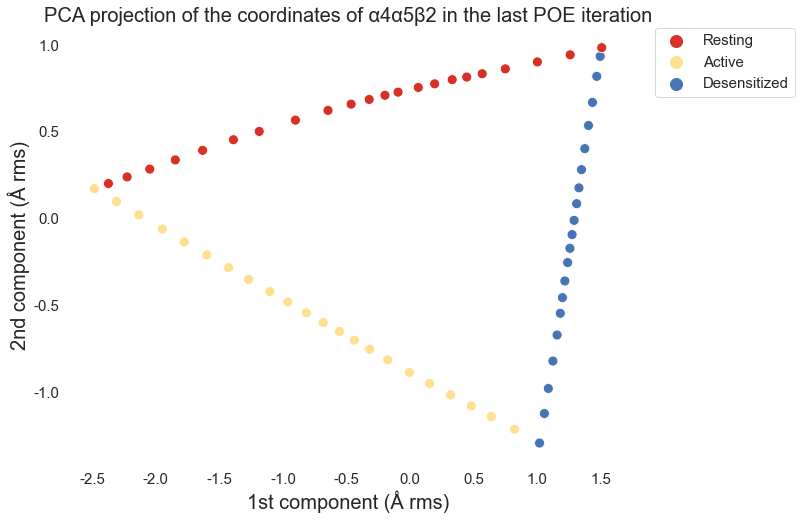

In [20]:
import seaborn as sns

sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)

b = sns.scatterplot(data=MPCA, x='x', y='y', hue='index', s=100, palette=['#d73027','#fee090','#4575b4'])

#b = sns.scatterplot(x='x', y='y', data=concatenated, hue='index', style='dataset')

b.axes.set_title("PCA projection of the coordinates of α4α5β2 in the last POE iteration",fontsize=20)
b.set_xlabel("1st component (Å rms)",fontsize=20)
b.set_ylabel("2nd component (Å rms)",fontsize=20)
b.tick_params(labelsize=9)
b.set_yticklabels(b.get_yticks(), size = 15)
b.set_xticklabels(b.get_xticks(), size = 15)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,markerscale=2,fontsize=15)


plt.savefig('PCA.png',bbox_inches='tight')

In [14]:
concatenated.to_csv('PCA_3rdPOE.txt', sep=' ', index=False)

In [14]:
import plotly.express as px
fig = px.scatter_3d(concatenated, x='x', 
                    y='y', z='z',color='index',symbol='dataset')
fig.show()

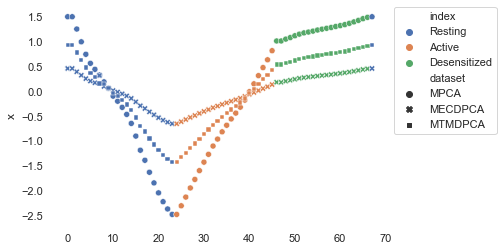

In [15]:
sns.scatterplot(x=concatenated.index, y=concatenated['x'], data=concatenated, hue='index', style='dataset')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

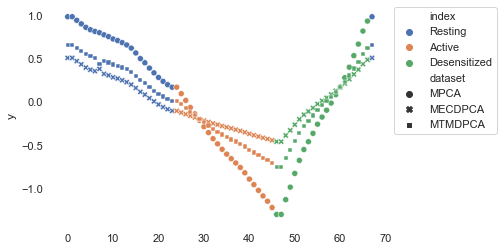

In [16]:
sns.scatterplot(x=concatenated.index, y=concatenated['y'], data=concatenated, hue='index', style='dataset')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

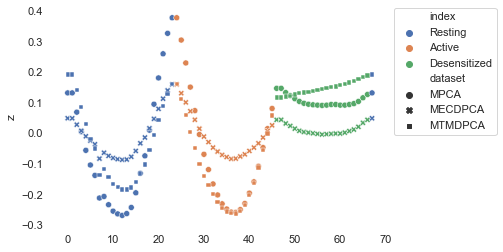

In [17]:
sns.scatterplot(x=concatenated.index, y=concatenated['z'], data=concatenated, hue='index', style='dataset')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [19]:
import numpy as np
np.set_printoptions(suppress=True)

# norm just to visualize
first = Mdotv_Vstep[:,0:1] / np.linalg.norm(Mdotv_Vstep[:,0:1])
second = Mdotv_Vstep[:,1:2] / np.linalg.norm(Mdotv_Vstep[:,1:2])
third = Mdotv_Vstep[:,2:] / np.linalg.norm(Mdotv_Vstep[:,2:])

df = pd.DataFrame(first)
df[1]= second
df[2]= third


Mdotv_Vstepdf = pd.DataFrame(df)
Mdotv_Vstepdf.columns =['PC1', 'PC2', 'PC3']
_meannp = _mean.to_numpy()


CA_only_pdb = open('/Users/marianagonzmed/Desktop/PATH_analysis/last_POE_path_analysis/CA_only/trj3_0001_CA.pdb', 'r')
lines = CA_only_pdb.readlines()

#components= ['PC1','PC2','PC3']
components= ['PC1','PC2','PC3']
for component in components:
    for i in range(1,20):
        A = 1
        cos = np.cos(np.pi*i/10) * A
        mean_A = np.round((_meannp + cos * Mdotv_Vstepdf[component].to_numpy()), 3)
        chnks = [mean_A [x:x+3] for x in range(0, len(mean_A), 3)]
        df = pd.DataFrame (chnks, columns = ['x','y','z'])
        #new_col = "CA"
        #df.insert(loc=0, column='atom', value=new_col)
        #df.to_csv('%s_frame%d.xyz' % (component, i), header=None,index=None, sep='\t')
        
        hs = open("%s_frame%d.pdb" % (component, i), "a")
        i=0
        for line in lines:
            new_x = str(df.iloc[i][0])
            new_y = str(df.iloc[i][1])
            new_z = str(df.iloc[i][2])
                        
            if len(new_x.split('.')[0]) == 3:
                x = "     " + new_x
            if len(new_x.split('.')[0]) == 2:
                x = "      " + new_x    
            if len(new_x.split('.')[0]) == 1:
                x = "       " + new_x    
            
            if len(new_x.split('.')[1]) == 3:
                x = x
            if len(new_x.split('.')[1]) == 2:
                x = x + " "
            if len(new_x.split('.')[1]) == 1:
                x = x + "  "
            
            
            
            if len(new_y.split('.')[0]) == 3:
                y = " " + new_y
            if len(new_y.split('.')[0]) == 2:
                y = "  " + new_y  
            if len(new_y.split('.')[0]) == 1:
                y = "   " + new_y
                
            if len(new_y.split('.')[1]) == 3:
                y = y
            if len(new_y.split('.')[1]) == 2:
                y = y + " "
            if len(new_y.split('.')[1]) == 1:
                y = y + "  "
            
            
            
            if len(new_z.split('.')[0]) == 3:
                z = " " + new_z
            if len(new_z.split('.')[0]) == 2:
                z = "  " + new_z   
            if len(new_z.split('.')[0]) == 1:
                z = "   " + new_z
                
            if len(new_z.split('.')[1]) == 3:
                z = z
            if len(new_z.split('.')[1]) == 2:
                z = z + " "
            if len(new_z.split('.')[1]) == 1:
                z = z + "  "
                            
            new_character = x + y + z
            
            position_1 = 26
            position_2 = 54
            
            string = line[:position_1] + new_character + line[position_2:]

            hs.write(string)
            i += 1

# Lower β-sandwich expansion

In [21]:
# templates
_6uwz_path = '/Users/marianagonzmed/Desktop/PATH_analysis/TEMPLATES/6uwz_CA.pdb'
TMD_6uwz_path = '/Users/marianagonzmed/Desktop/PATH_analysis/TEMPLATES/6uwz_TMDwMA.pdb'
_5kxi_path = '/Users/marianagonzmed/Desktop/PATH_analysis/TEMPLATES/aligned_5kxi_CA.pdb'
TMD_5kxi_path = '/Users/marianagonzmed/Desktop/PATH_analysis/TEMPLATES/aligned_5kxi_TMDwMA.pdb'
_6pv7_path = '/Users/marianagonzmed/Desktop/PATH_analysis/TEMPLATES/aligned_6pv7_CA.pdb'
TMD_6pv7_path = '/Users/marianagonzmed/Desktop/PATH_analysis/TEMPLATES/aligned_6pv7_TMDwMA.pdb'
_7koo_path = '/Users/marianagonzmed/Desktop/PATH_analysis/TEMPLATES/aligned_7koo_CA.pdb'
TMD_7koo_path = '/Users/marianagonzmed/Desktop/PATH_analysis/TEMPLATES/aligned_7koo_TMDwMA.pdb'
_7koq_path = '/Users/marianagonzmed/Desktop/PATH_analysis/TEMPLATES/aligned_7koq_CA.pdb'
TMD_7koq_path = '/Users/marianagonzmed/Desktop/PATH_analysis/TEMPLATES/aligned_7koq_TMDwMA.pdb'
_7kox_path = '/Users/marianagonzmed/Desktop/PATH_analysis/TEMPLATES/aligned_7kox_CA.pdb'
TMD_7kox_path = '/Users/marianagonzmed/Desktop/PATH_analysis/TEMPLATES/aligned_7kox_TMDwMA.pdb'

paths = [_7koo_path, _7koq_path, _7kox_path]
tmds = [TMD_7koo_path, TMD_7koq_path,TMD_7kox_path]

In [51]:
# lower β-sandwich expansion (referred to as ‘β- expansion’), defined as the distance between 
# Cα COM for residues 30-34 to Cα COM for residues 190-194  (IN GLIC!)

#Model
# a4 between 43-47 and 205-209
# a5 between 45-49 and 204-208
# b2 between 45-49 and 204-208

import numpy as np
from biopandas.pdb import PandasPdb
from scipy.spatial import distance
import pathlib

def process_prot(out_file, pdbs_list):
    
    for pdb in pdbs_list:
        ppdb = PandasPdb().read_pdb(pdb)
        df_pdb = ppdb.df['ATOM']

        # A4NA A4ND A5NC B2NB B2NE

        loop1_A4NA = df_pdb.loc[df_pdb['segment_id'] == 'A4NA'].query('43 <= residue_number <= 47')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
        loop2_A4NA = df_pdb.loc[df_pdb['segment_id'] == 'A4NA'].query('205 <= residue_number <= 209')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
        dist_A4NA = np.linalg.norm(loop1_A4NA-loop2_A4NA)

        loop1_A4ND = df_pdb.loc[df_pdb['segment_id'] == 'A4ND'].query('43 <= residue_number <= 47')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
        loop2_A4ND = df_pdb.loc[df_pdb['segment_id'] == 'A4ND'].query('205 <= residue_number <= 209')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
        dist_A4ND = np.linalg.norm(loop1_A4ND-loop2_A4ND)

        loop1_A5NC = df_pdb.loc[df_pdb['segment_id'] == 'A5NC'].query('45 <= residue_number <= 49')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
        loop2_A5NC = df_pdb.loc[df_pdb['segment_id'] == 'A5NC'].query('204 <= residue_number <= 208')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
        dist_A5NC = np.linalg.norm(loop1_A5NC-loop2_A5NC)

        loop1_B2NB = df_pdb.loc[df_pdb['segment_id'] == 'B2NB'].query('45 <= residue_number <= 49')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
        loop2_B2NB = df_pdb.loc[df_pdb['segment_id'] == 'B2NB'].query('204 <= residue_number <= 208')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
        dist_B2NB = np.linalg.norm(loop1_B2NB-loop2_B2NB)

        loop1_B2NE = df_pdb.loc[df_pdb['segment_id'] == 'B2NE'].query('45 <= residue_number <= 49')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
        loop2_B2NE = df_pdb.loc[df_pdb['segment_id'] == 'B2NE'].query('204 <= residue_number <= 208')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
        dist_B2NE = np.linalg.norm(loop1_B2NE-loop2_B2NE)

        lis_dist = [dist_A4NA, dist_A4ND, dist_A5NC, dist_B2NB, dist_B2NE]
        average_dist = sum(lis_dist) / len(lis_dist)

        pdb_name = pdb.split('/')[-1]
        string = (pdb_name+" %f" % average_dist + '\n')
        out_file.write(string)

out_file = open("POE1_Bsandwich_exp.dat", "w")
all_pdbs = [str(_) for _ in pathlib.Path('/Users/marianagonzmed/Desktop/PATH_analysis/first_POE_path_analysis/CA_only/').glob('*.pdb')]
process_prot(out_file, all_pdbs)
out_file.close()

out_file = open("POE2_Bsandwich_exp.dat", "w")
all_pdbs = [str(_) for _ in pathlib.Path('/Users/marianagonzmed/Desktop/PATH_analysis/second_POE_path_analysis/CA_only/').glob('*.pdb')]
process_prot(out_file, all_pdbs)
out_file.close()

out_file = open("POE3_Bsandwich_exp.dat", "w")
all_pdbs = [str(_) for _ in pathlib.Path('/Users/marianagonzmed/Desktop/PATH_analysis/last_POE_path_analysis/CA_only/').glob('*.pdb')]
process_prot(out_file, all_pdbs)
out_file.close()

#6uwz

# a1 between 42-46 and 206-210
# d between 45-49 and 220-224
# b1 between 43-47 and 212-216
# a1 between 43-47 and 206-210
# g between 43-47 and 206-210

out_file = open("temps_Bsandwich_exp.dat", "w")

ppdb = PandasPdb().read_pdb(_6uwz_path)
df_pdb = ppdb.df['ATOM']

loop1_a1 = df_pdb.loc[df_pdb['chain_id'] == 'A'].query('42 <= residue_number <= 46')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
loop2_a1 = df_pdb.loc[df_pdb['chain_id'] == 'A'].query('206 <= residue_number <= 210')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
dist_a1 = np.linalg.norm(loop1_a1-loop2_a1)

loop1_d = df_pdb.loc[df_pdb['chain_id'] == 'B'].query('45 <= residue_number <= 49')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
loop2_d = df_pdb.loc[df_pdb['chain_id'] == 'B'].query('220 <= residue_number <= 224')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
dist_d = np.linalg.norm(loop1_d-loop2_d)

loop1_b1 = df_pdb.loc[df_pdb['chain_id'] == 'C'].query('43 <= residue_number <= 47')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
loop2_b1 = df_pdb.loc[df_pdb['chain_id'] == 'C'].query('212 <= residue_number <= 216')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
dist_b1 = np.linalg.norm(loop1_b1-loop2_b1)

loop1_a12 = df_pdb.loc[df_pdb['chain_id'] == 'D'].query('43 <= residue_number <= 47')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
loop2_a12 = df_pdb.loc[df_pdb['chain_id'] == 'D'].query('206 <= residue_number <= 210')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
dist_a12 = np.linalg.norm(loop1_a12-loop2_a12)

loop1_g = df_pdb.loc[df_pdb['chain_id'] == 'E'].query('43 <= residue_number <= 47')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
loop2_g = df_pdb.loc[df_pdb['chain_id'] == 'E'].query('206 <= residue_number <= 210')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
dist_g = np.linalg.norm(loop1_g-loop2_g)

lis_dist = [dist_a1, dist_d, dist_b1, dist_a12, dist_g]
average_dist = sum(lis_dist) / len(lis_dist)
    
pdb_name = _6uwz_path.split('/')[-1]
string = (pdb_name+" %f" % average_dist + '\n')
print(string)
out_file.write(string)
    
# 5kxi
# a4 between 50-54 and 212-216
#b2 between 45-49 and 204-208

# A C E G I
# a b b a b
ppdb = PandasPdb().read_pdb(_5kxi_path)
df_pdb = ppdb.df['ATOM']

loop1_a4 = df_pdb.loc[df_pdb['chain_id'] == 'A'].query('50 <= residue_number <= 54')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()                                                
loop2_a4 = df_pdb.loc[df_pdb['chain_id'] == 'A'].query('212 <= residue_number <= 216')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
dist_a4 = np.linalg.norm(loop1_a4-loop2_a4)                                                

loop1_b2 = df_pdb.loc[df_pdb['chain_id'] == 'C'].query('45 <= residue_number <= 49')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
loop2_b2 = df_pdb.loc[df_pdb['chain_id'] == 'C'].query('204 <= residue_number <= 208')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
dist_b2 = np.linalg.norm(loop1_b2-loop2_b2)

loop1_b22 = df_pdb.loc[df_pdb['chain_id'] == 'E'].query('45 <= residue_number <= 49')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
loop2_b22 = df_pdb.loc[df_pdb['chain_id'] == 'E'].query('204 <= residue_number <= 208')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
dist_b22 = np.linalg.norm(loop1_b22-loop2_b22)

loop1_a22 = df_pdb.loc[df_pdb['chain_id'] == 'G'].query('50 <= residue_number <= 54')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
loop2_a22 = df_pdb.loc[df_pdb['chain_id'] == 'G'].query('212 <= residue_number <= 216')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
dist_a22 = np.linalg.norm(loop1_a22-loop2_a22)

loop1_b23 = df_pdb.loc[df_pdb['chain_id'] == 'I'].query('45 <= residue_number <= 49')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
loop2_b23 = df_pdb.loc[df_pdb['chain_id'] == 'I'].query('204 <= residue_number <= 208')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
dist_b23 = np.linalg.norm(loop1_b23-loop2_b23)

lis_dist = [dist_a4, dist_b2, dist_b22, dist_a22, dist_b23]
average_dist = sum(lis_dist) / len(lis_dist)
    
pdb_name = _5kxi_path.split('/')[-1]
string = (pdb_name+" %f" % average_dist + '\n')
print(string)
out_file.write(string)

# 6pv7
#a3 between 43-47 and 205-209
#b4 between 47-51 and 206-210
                                                 
# A C E G I
# a b b a b
                                                
ppdb = PandasPdb().read_pdb(_6pv7_path)
df_pdb = ppdb.df['ATOM']

loop1_a3 = df_pdb.loc[df_pdb['chain_id'] == 'A'].query('43 <= residue_number <= 47')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
loop2_a3 = df_pdb.loc[df_pdb['chain_id'] == 'A'].query('205 <= residue_number <= 209')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
dist_a3 = np.linalg.norm(loop1_a3-loop2_a3)

loop1_b4 = df_pdb.loc[df_pdb['chain_id'] == 'C'].query('47 <= residue_number <= 51')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
loop2_b4 = df_pdb.loc[df_pdb['chain_id'] == 'C'].query('206 <= residue_number <= 210')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
dist_b4 = np.linalg.norm(loop1_b4-loop2_b4)

loop1_b42 = df_pdb.loc[df_pdb['chain_id'] == 'E'].query('47 <= residue_number <= 51')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
loop2_b42 = df_pdb.loc[df_pdb['chain_id'] == 'E'].query('206 <= residue_number <= 210')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
dist_b42 = np.linalg.norm(loop1_b42-loop2_b42)

loop1_a32 = df_pdb.loc[df_pdb['chain_id'] == 'G'].query('43 <= residue_number <= 47')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
loop2_a32 = df_pdb.loc[df_pdb['chain_id'] == 'G'].query('205 <= residue_number <= 209')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
dist_a32 = np.linalg.norm(loop1_a32-loop2_a32)

loop1_b43 = df_pdb.loc[df_pdb['chain_id'] == 'I'].query('47 <= residue_number <= 51')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
loop2_b43 = df_pdb.loc[df_pdb['chain_id'] == 'I'].query('206 <= residue_number <= 210')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
dist_b43 = np.linalg.norm(loop1_b43-loop2_b43)

lis_dist = [dist_a3, dist_b4, dist_b42, dist_a32, dist_b43]
average_dist = sum(lis_dist) / len(lis_dist)
    
pdb_name = _6pv7_path.split('/')[-1]
string = (pdb_name+" %f" % average_dist + '\n')
print(string)
out_file.write(string)

# a7 between 42-46 and 202-206

for pdb in paths:
    ppdb = PandasPdb().read_pdb(pdb)
    df_pdb = ppdb.df['ATOM']
    
    loop1_A4NA = df_pdb.loc[df_pdb['chain_id'] == 'A'].query('42 <= residue_number <= 46')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
    loop2_A4NA = df_pdb.loc[df_pdb['chain_id'] == 'A'].query('202 <= residue_number <= 206')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
    dist_A4NA = np.linalg.norm(loop1_A4NA-loop2_A4NA)

    loop1_A4ND = df_pdb.loc[df_pdb['chain_id'] == 'B'].query('42 <= residue_number <= 46')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
    loop2_A4ND = df_pdb.loc[df_pdb['chain_id'] == 'B'].query('202 <= residue_number <= 206')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
    dist_A4ND = np.linalg.norm(loop1_A4ND-loop2_A4ND)

    loop1_A5NC = df_pdb.loc[df_pdb['chain_id'] == 'C'].query('42 <= residue_number <= 46')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
    loop2_A5NC = df_pdb.loc[df_pdb['chain_id'] == 'C'].query('202 <= residue_number <= 206')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
    dist_A5NC = np.linalg.norm(loop1_A5NC-loop2_A5NC)

    loop1_B2NB = df_pdb.loc[df_pdb['chain_id'] == 'D'].query('42 <= residue_number <= 46')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
    loop2_B2NB = df_pdb.loc[df_pdb['chain_id'] == 'D'].query('202 <= residue_number <= 206')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
    dist_B2NB = np.linalg.norm(loop1_B2NB-loop2_B2NB)

    loop1_B2NE = df_pdb.loc[df_pdb['chain_id'] == 'E'].query('42 <= residue_number <= 46')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
    loop2_B2NE = df_pdb.loc[df_pdb['chain_id'] == 'E'].query('202 <= residue_number <= 206')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
    dist_B2NE = np.linalg.norm(loop1_B2NE-loop2_B2NE)

    lis_dist = [dist_A4NA, dist_A4ND, dist_A5NC, dist_B2NB, dist_B2NE]
    average_dist = sum(lis_dist) / len(lis_dist)
    
    pdb_name = pdb.split('/')[-1]
    string = (pdb_name+" %f" % average_dist + '\n')
    print(string)
    out_file.write(string)

out_file.close()


6uwz_CA.pdb 15.807372

aligned_5kxi_CA.pdb 13.543550

aligned_6pv7_CA.pdb 13.983641

aligned_7koo_CA.pdb 14.511021

aligned_7koq_CA.pdb 14.350970

aligned_7kox_CA.pdb 14.186869



130
67
67


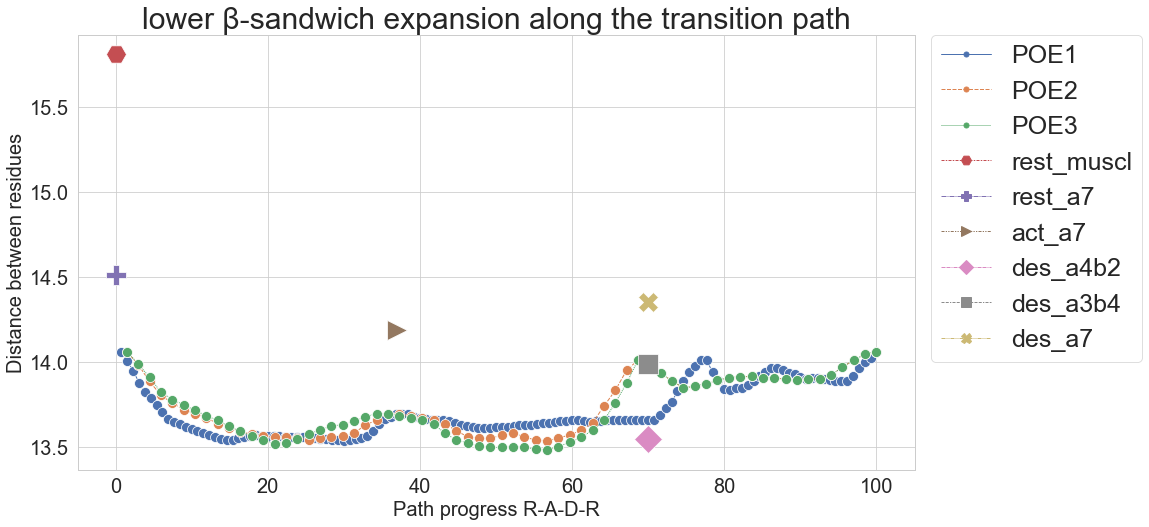

In [55]:
import subprocess

#!./parse_results.sh POE1_Bsandwich_exp.dat POE1
#!./parse_results.sh POE2_Bsandwich_exp.dat POE2
#!./parse_results.sh POE3_Bsandwich_exp.dat POE3
#! cat POE1_Bsandwich_exp.dat POE2_Bsandwich_exp.dat POE3_Bsandwich_exp.dat temps_Bsandwich_exp.dat > all_Bsandwich_exp.dat

POE_angle=pd.read_csv('all_Bsandwich_exp.dat', header=None, sep=' ')
POE_angle
POE_angle.columns =['Name', 'Torsion_angle', 'Path progress', 'DB']

sns.set(style="whitegrid", rc = {'figure.figsize':(15,8)})
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 20}                  
sns.set_context("paper", rc = paper_rc) 
fig = sns.lineplot(data=POE_angle, x="Path progress", y="Torsion_angle",
                   hue="DB",style="DB", markers=['.','.','.','H', 'P', '>','D','s','X'])

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0,markerscale=0.5,
          fontsize=25, title_fontsize=25)
fig.axes.set_title("lower β-sandwich expansion along the transition path",fontsize=30)
fig.set_xlabel("Path progress R-A-D-R",fontsize=20)#
fig.set_ylabel("Distance between residues",fontsize=20)
fig.tick_params(labelsize=20)

# M2-M1(-) distance

In [66]:
# ( (-) indicating preceding subunit), defined as the distance between M1 
# (Cα COM for residues 200-204, subunit n-1) and M2 (Cα COM for residues 241-245, subunit n) (IN GLIC!)
import numpy as np
from biopandas.pdb import PandasPdb
from scipy.spatial import distance
import pathlib

# A4NA M2 258-262  B2NB M1 215-219
# B2NB M2 257-261 A5NC M1 215-219
# A5NC M2 257-261 A4ND M1 216-220
# A4ND M2 258-262 B2NE M1 215-219
# B2NE M2 257-261 A4NA M1 215-219

def m2_m1_distance(out_file, all_pdbs):
    for pdb in all_pdbs:
        ppdb = PandasPdb().read_pdb(pdb)
        df_pdb = ppdb.df['ATOM']

        helixM2_B2NE = df_pdb.loc[df_pdb['segment_id'] == 'A4NA'].query('258 <= residue_number <= 262')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
        helixM1_A4NA = df_pdb.loc[df_pdb['segment_id'] == 'B2NB'].query('215 <= residue_number <= 219')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
        dist_helixM2B2NE_helixM1A4NA = np.linalg.norm(helixM2_B2NE-helixM1_A4NA)

        helixM2_A4NA = df_pdb.loc[df_pdb['segment_id'] == 'B2NB'].query('257 <= residue_number <= 261')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
        helixM1_B2NB = df_pdb.loc[df_pdb['segment_id'] == 'A5NC'].query('215 <= residue_number <= 219')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
        dist_helixM2A4NA_helixM1B2NB = np.linalg.norm(helixM2_A4NA-helixM1_B2NB)

        helixM2_B2NB = df_pdb.loc[df_pdb['segment_id'] == 'A5NC'].query('257 <= residue_number <= 261')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
        helixM1_A5NC = df_pdb.loc[df_pdb['segment_id'] == 'A4ND'].query('216 <= residue_number <= 220')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
        dist_helixM2B2NB_helixM1A5NC = np.linalg.norm(helixM2_B2NB-helixM1_A5NC)

        helixM2_A5NC = df_pdb.loc[df_pdb['segment_id'] == 'A4ND'].query('258 <= residue_number <= 262')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
        helixM1_A4ND = df_pdb.loc[df_pdb['segment_id'] == 'B2NE'].query('215 <= residue_number <= 219')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
        dist_helixM2A5NC_helixM1A4ND = np.linalg.norm(helixM2_A5NC-helixM1_A4ND)

        helixM2_A4ND = df_pdb.loc[df_pdb['segment_id'] == 'B2NE'].query('257 <= residue_number <= 261')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
        helixM1_B2NE = df_pdb.loc[df_pdb['segment_id'] == 'A4NA'].query('215 <= residue_number <= 219')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
        dist_helixM2A4ND_helixM1B2NE = np.linalg.norm(helixM2_A4ND-helixM1_B2NE)

        lis_dist = [dist_helixM2B2NE_helixM1A4NA,
                    dist_helixM2A4NA_helixM1B2NB,
                    dist_helixM2B2NB_helixM1A5NC,
                    dist_helixM2A5NC_helixM1A4ND,
                    dist_helixM2A4ND_helixM1B2NE]

        average_dist = sum(lis_dist) / len(lis_dist)

        pdb_name = pdb.split('/')[-1]
        string = (pdb_name+" %f" % average_dist + '\n')
        print(string)
        out_file.write(string)
        
out_file = open("POE1M2_M1-distance.dat", "w")
all_pdbs = [str(_) for _ in pathlib.Path('/Users/marianagonzmed/Desktop/PATH_analysis/first_POE_path_analysis/CA_only/').glob('*.pdb')]
m2_m1_distance(out_file, all_pdbs)
out_file.close()

out_file = open("POE2M2_M1-distance.dat", "w")
all_pdbs = [str(_) for _ in pathlib.Path('/Users/marianagonzmed/Desktop/PATH_analysis/second_POE_path_analysis/CA_only/').glob('*.pdb')]
m2_m1_distance(out_file, all_pdbs)
out_file.close()

out_file = open("POE3M2_M1-distance.dat", "w")
all_pdbs = [str(_) for _ in pathlib.Path('/Users/marianagonzmed/Desktop/PATH_analysis/last_POE_path_analysis/CA_only/').glob('*.pdb')]
m2_m1_distance(out_file, all_pdbs)
out_file.close()


#TEMPLATES
out_file = open("temps_M2-M1DIST.dat", "w")

# 6uwz

# a1 M2 259-263 and d M1- 231-235
# d M2 272-276 and b1 M1- 223-227
# b1 M2 263-267 and a1 M1- 217-221
# a1 M2 259-263 and g M1- 225-229
# g M2 268-272 and a1 M1- 217-221

ppdb = PandasPdb().read_pdb(_6uwz_path)
df_pdb = ppdb.df['ATOM']

m2_a1 = df_pdb.loc[df_pdb['chain_id'] == 'A'].query('259 <= residue_number <= 263')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
m1_d = df_pdb.loc[df_pdb['chain_id'] == 'B'].query('231 <= residue_number <= 235')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
dist_a1d = np.linalg.norm(m2_a1-m1_d)

m2_d = df_pdb.loc[df_pdb['chain_id'] == 'B'].query('272 <= residue_number <= 276')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
m1_b1 = df_pdb.loc[df_pdb['chain_id'] == 'C'].query('223 <= residue_number <= 227')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
dist_db1 = np.linalg.norm(m2_d-m1_b1)

m2_b1 = df_pdb.loc[df_pdb['chain_id'] == 'C'].query('263 <= residue_number <= 267')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
m1_a12 = df_pdb.loc[df_pdb['chain_id'] == 'D'].query('217 <= residue_number <= 221')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
dist_b1a12 = np.linalg.norm(m2_b1-m1_a12)

m2_a12 = df_pdb.loc[df_pdb['chain_id'] == 'D'].query('259 <= residue_number <= 263')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
m1_g = df_pdb.loc[df_pdb['chain_id'] == 'E'].query('225 <= residue_number <= 229')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
dist_a12g = np.linalg.norm(m2_a12-m1_g)

m2_g = df_pdb.loc[df_pdb['chain_id'] == 'E'].query('268 <= residue_number <= 272')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
m1_a1 = df_pdb.loc[df_pdb['chain_id'] == 'A'].query('217 <= residue_number <= 221')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
dist_ga1 = np.linalg.norm(m2_g-m1_a1)

lis_dist = [dist_a1d, dist_db1, dist_b1a12, dist_a12g, dist_ga1]
average_dist = sum(lis_dist) / len(lis_dist)
    
pdb_name = _6uwz_path.split('/')[-1]
string = (pdb_name+" %f" % average_dist + '\n')
print(string)

out_file.write(string)

#5kxi
# A4 M2 265-269 B2 M1- 212-216
# B2 M2 257-261 B2 M1- 212-216
# B2 M2 257-261 A4 M1- 220-224
# A4 M2 265-269 B2 M1- 212-216
# B2 M2 257-261 A4 M1- 220-224

ppdb = PandasPdb().read_pdb(_5kxi_path)
df_pdb = ppdb.df['ATOM']

m2_a4 = df_pdb.loc[df_pdb['chain_id'] == 'A'].query('265 <= residue_number <= 269')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()                                                
m1_b2 = df_pdb.loc[df_pdb['chain_id'] == 'C'].query('212 <= residue_number <= 216')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
dist_a4b2 = np.linalg.norm(m2_a4-m1_b2)                                                

m2_b2 = df_pdb.loc[df_pdb['chain_id'] == 'C'].query('257 <= residue_number <= 261')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
m1_b22 = df_pdb.loc[df_pdb['chain_id'] == 'E'].query('212 <= residue_number <= 216')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
dist_b2b22 = np.linalg.norm(m2_b2-m1_b22)

m2_b22 = df_pdb.loc[df_pdb['chain_id'] == 'E'].query('257 <= residue_number <= 261')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
m1_a42 = df_pdb.loc[df_pdb['chain_id'] == 'G'].query('220 <= residue_number <= 224')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
dist_b22b42 = np.linalg.norm(m2_b22-m1_a42)

m2_a42 = df_pdb.loc[df_pdb['chain_id'] == 'G'].query('265 <= residue_number <= 269')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
m1_b23 = df_pdb.loc[df_pdb['chain_id'] == 'I'].query('212 <= residue_number <= 216')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
dist_a42b23 = np.linalg.norm(m2_a42-m1_b23)

m2_b23 = df_pdb.loc[df_pdb['chain_id'] == 'I'].query('257 <= residue_number <= 261')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
m1_a4 = df_pdb.loc[df_pdb['chain_id'] == 'A'].query('220 <= residue_number <= 224')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
dist_b23a4 = np.linalg.norm(m2_b23-m1_a4)

lis_dist = [dist_a4b2, dist_b2b22, dist_b22b42, dist_a42b23, dist_b23a4]
average_dist = sum(lis_dist) / len(lis_dist)
    
pdb_name = _5kxi_path.split('/')[-1]
string = (pdb_name+" %f" % average_dist + '\n')
print(string)
out_file.write(string)

# 6PV7
# A3 M2 258-262 B4 M1- 214-218
# B4 M2 259-263 B4 M1- 214-218
# B4 M2 259-263 A3 M1- 213-217
# A3 M2 258-262 B4 M1- 214-218
# B4 M2 259-263 A3 M1- 213-217

ppdb = PandasPdb().read_pdb(_6pv7_path)
df_pdb = ppdb.df['ATOM']

m2_a3 = df_pdb.loc[df_pdb['chain_id'] == 'A'].query('258 <= residue_number <= 262')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
m1_b4 = df_pdb.loc[df_pdb['chain_id'] == 'C'].query('214 <= residue_number <= 218')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
dist_a3b4 = np.linalg.norm(m2_a3-m1_b4)

m2_b4 = df_pdb.loc[df_pdb['chain_id'] == 'C'].query('259 <= residue_number <= 263')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
m1_b42 = df_pdb.loc[df_pdb['chain_id'] == 'E'].query('214 <= residue_number <= 218')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
dist_b4b42 = np.linalg.norm(m2_b4-m1_b42)

m2_b42 = df_pdb.loc[df_pdb['chain_id'] == 'E'].query('259 <= residue_number <= 263')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
m1_a32 = df_pdb.loc[df_pdb['chain_id'] == 'G'].query('213 <= residue_number <= 217')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
dist_b42a32 = np.linalg.norm(m2_b42-m1_a32)

m2_a32 = df_pdb.loc[df_pdb['chain_id'] == 'G'].query('258 <= residue_number <= 262')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
m1_b43 = df_pdb.loc[df_pdb['chain_id'] == 'I'].query('214 <= residue_number <= 218')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
dist_a32b43 = np.linalg.norm(m2_a32-m1_b43)

m2_b43 = df_pdb.loc[df_pdb['chain_id'] == 'I'].query('259 <= residue_number <= 263')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
m1_a3 = df_pdb.loc[df_pdb['chain_id'] == 'A'].query('213 <= residue_number <= 217')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
dist_b43a3 = np.linalg.norm(m2_b43-m1_a3)

lis_dist = [dist_a3b4, dist_b4b42, dist_b42a32, dist_a32b43, dist_b43a3]
average_dist = sum(lis_dist) / len(lis_dist)
    
pdb_name = _6pv7_path.split('/')[-1]
string = (pdb_name+" %f" % average_dist + '\n')
print(string)
out_file.write(string)


#A7 M2 255-259  M1 210-214

for pdb in paths:
    ppdb = PandasPdb().read_pdb(pdb)
    df_pdb = ppdb.df['ATOM']
    
    loop1_A4NA = df_pdb.loc[df_pdb['chain_id'] == 'A'].query('255 <= residue_number <= 259')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
    loop2_A4NA = df_pdb.loc[df_pdb['chain_id'] == 'B'].query('210 <= residue_number <= 214')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
    dist_A4NA = np.linalg.norm(loop1_A4NA-loop2_A4NA)

    loop1_A4ND = df_pdb.loc[df_pdb['chain_id'] == 'B'].query('255 <= residue_number <= 259')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
    loop2_A4ND = df_pdb.loc[df_pdb['chain_id'] == 'C'].query('210 <= residue_number <= 214')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
    dist_A4ND = np.linalg.norm(loop1_A4ND-loop2_A4ND)

    loop1_A5NC = df_pdb.loc[df_pdb['chain_id'] == 'C'].query('255 <= residue_number <= 259')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
    loop2_A5NC = df_pdb.loc[df_pdb['chain_id'] == 'D'].query('210 <= residue_number <= 214')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
    dist_A5NC = np.linalg.norm(loop1_A5NC-loop2_A5NC)

    loop1_B2NB = df_pdb.loc[df_pdb['chain_id'] == 'D'].query('255 <= residue_number <= 259')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
    loop2_B2NB = df_pdb.loc[df_pdb['chain_id'] == 'E'].query('210 <= residue_number <= 214')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
    dist_B2NB = np.linalg.norm(loop1_B2NB-loop2_B2NB)

    loop1_B2NE = df_pdb.loc[df_pdb['chain_id'] == 'E'].query('255 <= residue_number <= 259')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
    loop2_B2NE = df_pdb.loc[df_pdb['chain_id'] == 'A'].query('210 <= residue_number <= 214')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
    dist_B2NE = np.linalg.norm(loop1_B2NE-loop2_B2NE)

    lis_dist = [dist_A4NA, dist_A4ND, dist_A5NC, dist_B2NB, dist_B2NE]
    average_dist = sum(lis_dist) / len(lis_dist)
    
    pdb_name = pdb.split('/')[-1]
    string = (pdb_name+" %f" % average_dist + '\n')
    print(string)
    out_file.write(string)

out_file.close()

trj1_001_CA.pdb 13.549111

trj1_002_CA.pdb 13.566224

trj1_003_CA.pdb 13.583613

trj1_004_CA.pdb 13.613560

trj1_005_CA.pdb 13.646366

trj1_006_CA.pdb 13.677909

trj1_007_CA.pdb 13.726613

trj1_008_CA.pdb 13.774058

trj1_009_CA.pdb 13.809764

trj1_010_CA.pdb 13.827956

trj1_011_CA.pdb 13.842865

trj1_012_CA.pdb 13.858755

trj1_013_CA.pdb 13.870600

trj1_014_CA.pdb 13.883332

trj1_015_CA.pdb 13.895050

trj1_016_CA.pdb 13.904395

trj1_017_CA.pdb 13.913706

trj1_018_CA.pdb 13.921584

trj1_019_CA.pdb 13.932984

trj1_020_CA.pdb 13.945208

trj1_021_CA.pdb 13.965529

trj1_022_CA.pdb 13.982349

trj1_023_CA.pdb 13.992626

trj1_024_CA.pdb 14.004051

trj1_025_CA.pdb 14.017693

trj1_026_CA.pdb 14.033034

trj1_027_CA.pdb 14.045838

trj1_028_CA.pdb 14.062720

trj1_029_CA.pdb 14.074056

trj1_030_CA.pdb 14.061461

trj1_031_CA.pdb 14.047182

trj1_032_CA.pdb 14.028074

trj1_033_CA.pdb 14.013455

trj1_034_CA.pdb 14.004419

trj1_035_CA.pdb 13.991157

trj1_036_CA.pdb 13.982274

trj1_037_CA.pdb 13.981003

t

130
67
67


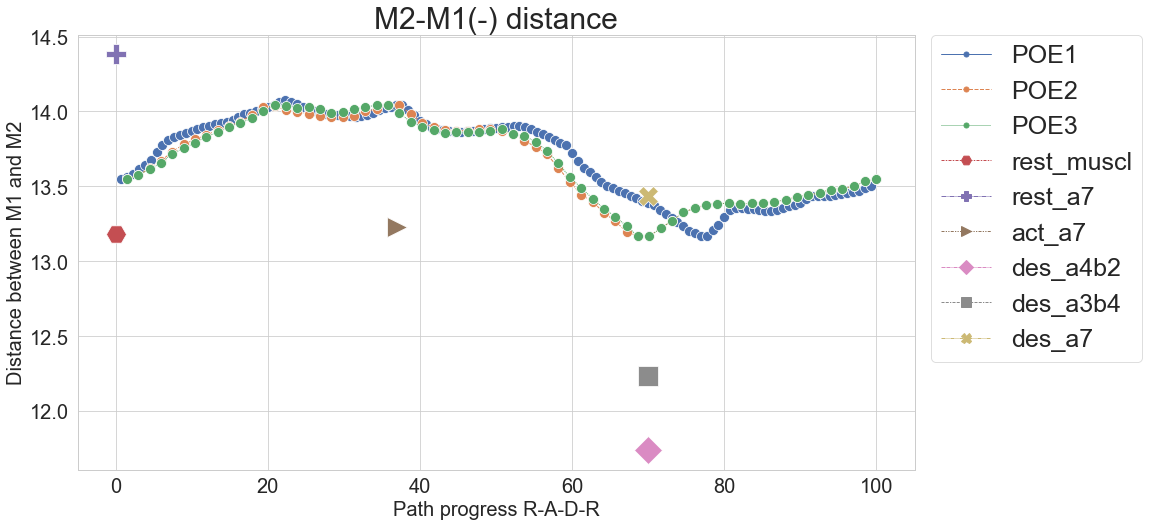

In [88]:
!./parse_results.sh POE1M2_M1-distance.dat POE1
!./parse_results.sh POE2M2_M1-distance.dat POE2
!./parse_results.sh POE3M2_M1-distance.dat POE3

! cat POE1M2_M1-distance.dat POE2M2_M1-distance.dat POE3M2_M1-distance.dat temps_M2-M1DIST.dat > all_M2_M1-distance.dat

POE_angle=pd.read_csv('all_M2_M1-distance.dat', header=None, sep=' ')

POE_angle.columns =['Name', 'Torsion_angle', 'Path progress', 'DB']

sns.set(style="whitegrid", rc = {'figure.figsize':(15,8)})
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 20}                  
sns.set_context("paper", rc = paper_rc) 
fig = sns.lineplot(data=POE_angle, x="Path progress", y="Torsion_angle",
                   hue="DB",style="DB", markers=['.','.','.','H', 'P', '>','D','s','X'])

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0,markerscale=0.5,
           fontsize=25, title_fontsize=25)
fig.axes.set_title("M2-M1(-) distance",fontsize=30)
fig.set_xlabel("Path progress R-A-D-R",fontsize=20)
fig.set_ylabel("Distance between M1 and M2",fontsize=20)
fig.tick_params(labelsize=20)

# M2 Top Spread or M2 radius. M2 collapse = (1 − M2 radius).

In [89]:
#  defined as distance between Cα COM for residues 241-245 and full TMD Cα COM (IN GLIC!)

import numpy as np
from biopandas.pdb import PandasPdb
from scipy.spatial import distance
import pathlib
    
# A4NA M2 258-262 
# B2NB M2 257-261
# A5NC M2 258-262
# A4ND M2 258-262 
# B2NE M2 257-261

def m2_topspread(out_file,all_pdbs_TMDS,all_pdbs):
    for pdb,TMD in zip(all_pdbs,all_pdbs_TMDS):

        ppdb_tmd = PandasPdb().read_pdb(TMD)
        tmd_mean = ppdb_tmd.df['ATOM'][['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
        TMD_name = TMD.split('/')[-1]

        ppdb = PandasPdb().read_pdb(pdb)
        df_pdb = ppdb.df['ATOM']
        pdb_name = pdb.split('/')[-1]

        M2_A4NA = df_pdb.loc[df_pdb['segment_id'] == 'A4NA'].query('258 <= residue_number <= 262')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
        dist_M2A4NA_TMD = np.linalg.norm(M2_A4NA-tmd_mean)

        M2_A4ND = df_pdb.loc[df_pdb['segment_id'] == 'B2NB'].query('257 <= residue_number <= 261')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
        dist_M2A4ND_TMD = np.linalg.norm(M2_A4ND-tmd_mean)

        M2_A5NC = df_pdb.loc[df_pdb['segment_id'] == 'A5NC'].query('258 <= residue_number <= 262')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
        dist_M2A5NC_TMD = np.linalg.norm(M2_A5NC-tmd_mean)

        M2_B2NB = df_pdb.loc[df_pdb['segment_id'] == 'A4ND'].query('258 <= residue_number <= 262')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
        dist_M2B2NB_TMD = np.linalg.norm(M2_B2NB-tmd_mean)

        M2_B2NE = df_pdb.loc[df_pdb['segment_id'] == 'B2NE'].query('257 <= residue_number <= 261')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
        dist_M2B2NE_TMD = np.linalg.norm(M2_B2NE-tmd_mean)

        lis_dist = [dist_M2A4NA_TMD,
                    dist_M2A4ND_TMD,
                    dist_M2A5NC_TMD,
                    dist_M2B2NB_TMD,
                    dist_M2B2NE_TMD]

        pdb_name = pdb.split('/')[-1]

        average_dist = sum(lis_dist) / len(lis_dist)
        string = (pdb_name+" %f" % average_dist + '\n')
        print(string)
        out_file.write(string)

        
out_file = open("POE1M2_topSpread.dat", "w")
all_pdbs_TMDS = [str(_) for _ in pathlib.Path('/Users/marianagonzmed/Desktop/PATH_analysis/first_POE_path_analysis/TMD_CA/').glob('*_MXM4.pdb')]
all_pdbs = all_pdbs = [str(_) for _ in pathlib.Path('/Users/marianagonzmed/Desktop/PATH_analysis/first_POE_path_analysis/CA_only/').glob('*.pdb')]
m2_topspread(out_file,all_pdbs_TMDS,all_pdbs)
out_file.close()

out_file = open("POE2M2_topSpread.dat", "w")
all_pdbs_TMDS = [str(_) for _ in pathlib.Path('/Users/marianagonzmed/Desktop/PATH_analysis/second_POE_path_analysis/TMD_CA/').glob('*_M4MX.pdb')]
all_pdbs = all_pdbs = [str(_) for _ in pathlib.Path('/Users/marianagonzmed/Desktop/PATH_analysis/second_POE_path_analysis/CA_only/').glob('*.pdb')]
m2_topspread(out_file,all_pdbs_TMDS,all_pdbs)
out_file.close()

out_file = open("POE3M2_topSpread.dat", "w")
all_pdbs_TMDS = [str(_) for _ in pathlib.Path('/Users/marianagonzmed/Desktop/PATH_analysis/last_POE_path_analysis/TMD_CA/').glob('*_MTDwMA.pdb')]
all_pdbs = all_pdbs = [str(_) for _ in pathlib.Path('/Users/marianagonzmed/Desktop/PATH_analysis/last_POE_path_analysis/CA_only/').glob('*.pdb')]
m2_topspread(out_file,all_pdbs_TMDS,all_pdbs)
out_file.close()

out_file = open("temps_M2-TOPSPREAD.dat", "w")

# 6uwz

# a1 M2 259-263
# d M2 272-276
# b1 M2 263-267
# a1 M2 259-263
# g M2 268-272

ppdb = PandasPdb().read_pdb(_6uwz_path)
df_pdb = ppdb.df['ATOM']

ppdb_tmd = PandasPdb().read_pdb(TMD_6uwz_path)
tmd_mean = ppdb_tmd.df['ATOM'][['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()

m2_a1 = df_pdb.loc[df_pdb['chain_id'] == 'A'].query('259 <= residue_number <= 263')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
dist_a1d = np.linalg.norm(m2_a1-tmd_mean)

m2_d = df_pdb.loc[df_pdb['chain_id'] == 'B'].query('272 <= residue_number <= 276')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
dist_db1 = np.linalg.norm(m2_d-tmd_mean)

m2_b1 = df_pdb.loc[df_pdb['chain_id'] == 'C'].query('263 <= residue_number <= 267')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
dist_b1a12 = np.linalg.norm(m2_b1-tmd_mean)

m2_a12 = df_pdb.loc[df_pdb['chain_id'] == 'D'].query('259 <= residue_number <= 263')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
dist_a12g = np.linalg.norm(m2_a12-tmd_mean)

m2_g = df_pdb.loc[df_pdb['chain_id'] == 'E'].query('268 <= residue_number <= 272')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
dist_ga1 = np.linalg.norm(m2_g-tmd_mean)

lis_dist = [dist_a1d, dist_db1, dist_b1a12, dist_a12g, dist_ga1]
average_dist = sum(lis_dist) / len(lis_dist)
    
pdb_name = _6uwz_path.split('/')[-1]
string = (pdb_name+" %f" % average_dist + '\n')
print(string)
out_file.write(string)

#5kxi
# A4 M2 265-269
# B2 M2 257-261
# B2 M2 257-261
# A4 M2 265-269
# B2 M2 257-261

ppdb = PandasPdb().read_pdb(_5kxi_path)
df_pdb = ppdb.df['ATOM']

ppdb_tmd = PandasPdb().read_pdb(TMD_5kxi_path)
tmd_mean = ppdb_tmd.df['ATOM'][['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()

m2_a4 = df_pdb.loc[df_pdb['chain_id'] == 'A'].query('265 <= residue_number <= 269')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()                                                
dist_a4b2 = np.linalg.norm(m2_a4-tmd_mean)                                                

m2_b2 = df_pdb.loc[df_pdb['chain_id'] == 'C'].query('257 <= residue_number <= 261')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
dist_b2b22 = np.linalg.norm(m2_b2-tmd_mean)

m2_b22 = df_pdb.loc[df_pdb['chain_id'] == 'E'].query('257 <= residue_number <= 261')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
dist_b22b42 = np.linalg.norm(m2_b22-m1_a42)

m2_a42 = df_pdb.loc[df_pdb['chain_id'] == 'G'].query('265 <= residue_number <= 269')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
dist_a42b23 = np.linalg.norm(m2_a42-m1_b23)

m2_b23 = df_pdb.loc[df_pdb['chain_id'] == 'I'].query('257 <= residue_number <= 261')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
dist_b23a4 = np.linalg.norm(m2_b23-m1_a4)

lis_dist = [dist_a4b2, dist_b2b22, dist_b22b42, dist_a42b23, dist_b23a4]
average_dist = sum(lis_dist) / len(lis_dist)
    
pdb_name = _5kxi_path.split('/')[-1]
string = (pdb_name+" %f" % average_dist + '\n')
print(string)
out_file.write(string)

# 6PV7
# A3 M2 258-262
# B4 M2 259-263
# B4 M2 259-263
# A3 M2 258-262
# B4 M2 259-263

ppdb = PandasPdb().read_pdb(_6pv7_path)
df_pdb = ppdb.df['ATOM']

ppdb_tmd = PandasPdb().read_pdb(TMD_6pv7_path)
tmd_mean = ppdb_tmd.df['ATOM'][['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()

m2_a3 = df_pdb.loc[df_pdb['chain_id'] == 'A'].query('258 <= residue_number <= 262')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
dist_a3b4 = np.linalg.norm(m2_a3-tmd_mean)

m2_b4 = df_pdb.loc[df_pdb['chain_id'] == 'C'].query('259 <= residue_number <= 263')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
dist_b4b42 = np.linalg.norm(m2_b4-tmd_mean)

m2_b42 = df_pdb.loc[df_pdb['chain_id'] == 'E'].query('259 <= residue_number <= 263')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
dist_b42a32 = np.linalg.norm(m2_b42-tmd_mean)

m2_a32 = df_pdb.loc[df_pdb['chain_id'] == 'G'].query('258 <= residue_number <= 262')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
dist_a32b43 = np.linalg.norm(m2_a32-tmd_mean)

m2_b43 = df_pdb.loc[df_pdb['chain_id'] == 'I'].query('259 <= residue_number <= 263')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
dist_b43a3 = np.linalg.norm(m2_b43-tmd_mean)

lis_dist = [dist_a3b4, dist_b4b42, dist_b42a32, dist_a32b43, dist_b43a3]
average_dist = sum(lis_dist) / len(lis_dist)
    
pdb_name = _6pv7_path.split('/')[-1]
string = (pdb_name+" %f" % average_dist + '\n')
print(string)
out_file.write(string)

#A7 M2 255-259

for pdb, tmd in zip(paths, tmds):
    
    pdb_name = pdb.split('/')[-1]
    
    ppdb = PandasPdb().read_pdb(pdb)
    df_pdb = ppdb.df['ATOM']
    
    ppdb_tmd = PandasPdb().read_pdb(tmd)
    tmd_mean = ppdb_tmd.df['ATOM'][['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
    
    tmd_name = tmd.split('/')[-1]
  
    loop1_A4NA = df_pdb.loc[df_pdb['chain_id'] == 'A'].query('255 <= residue_number <= 259')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
    dist_A4NA = np.linalg.norm(loop1_A4NA-tmd_mean)

    loop1_A4ND = df_pdb.loc[df_pdb['chain_id'] == 'B'].query('255 <= residue_number <= 259')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
    dist_A4ND = np.linalg.norm(loop1_A4ND-tmd_mean)

    loop1_A5NC = df_pdb.loc[df_pdb['chain_id'] == 'C'].query('255 <= residue_number <= 259')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
    dist_A5NC = np.linalg.norm(loop1_A5NC-tmd_mean)

    loop1_B2NB = df_pdb.loc[df_pdb['chain_id'] == 'D'].query('255 <= residue_number <= 259')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
    dist_B2NB = np.linalg.norm(loop1_B2NB-tmd_mean)

    loop1_B2NE = df_pdb.loc[df_pdb['chain_id'] == 'E'].query('255 <= residue_number <= 259')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
    dist_B2NE = np.linalg.norm(loop1_B2NE-tmd_mean)

    lis_dist = [dist_A4NA, dist_A4ND, dist_A5NC, dist_B2NB, dist_B2NE]
    average_dist = sum(lis_dist) / len(lis_dist)
    
    pdb_name = pdb.split('/')[-1]
    string = (pdb_name+" %f" % average_dist + '\n')
    print(string)
    out_file.write(string)

out_file.close()

trj1_001_CA.pdb 24.270067

trj1_002_CA.pdb 24.267431

trj1_003_CA.pdb 24.262923

trj1_004_CA.pdb 24.259235

trj1_005_CA.pdb 24.263353

trj1_006_CA.pdb 24.269755

trj1_007_CA.pdb 24.283523

trj1_008_CA.pdb 24.294505

trj1_009_CA.pdb 24.301526

trj1_010_CA.pdb 24.307575

trj1_011_CA.pdb 24.313608

trj1_012_CA.pdb 24.322477

trj1_013_CA.pdb 24.328809

trj1_014_CA.pdb 24.336783

trj1_015_CA.pdb 24.344013

trj1_016_CA.pdb 24.348288

trj1_017_CA.pdb 24.352092

trj1_018_CA.pdb 24.356577

trj1_019_CA.pdb 24.363307

trj1_020_CA.pdb 24.371383

trj1_021_CA.pdb 24.380361

trj1_022_CA.pdb 24.394016

trj1_023_CA.pdb 24.403563

trj1_024_CA.pdb 24.411853

trj1_025_CA.pdb 24.414919

trj1_026_CA.pdb 24.419274

trj1_027_CA.pdb 24.423363

trj1_028_CA.pdb 24.427732

trj1_029_CA.pdb 24.430610

trj1_030_CA.pdb 24.427336

trj1_031_CA.pdb 24.423319

trj1_032_CA.pdb 24.421123

trj1_033_CA.pdb 24.424863

trj1_034_CA.pdb 24.429578

trj1_035_CA.pdb 24.437851

trj1_036_CA.pdb 24.440051

trj1_037_CA.pdb 24.434820

t

130
67
67


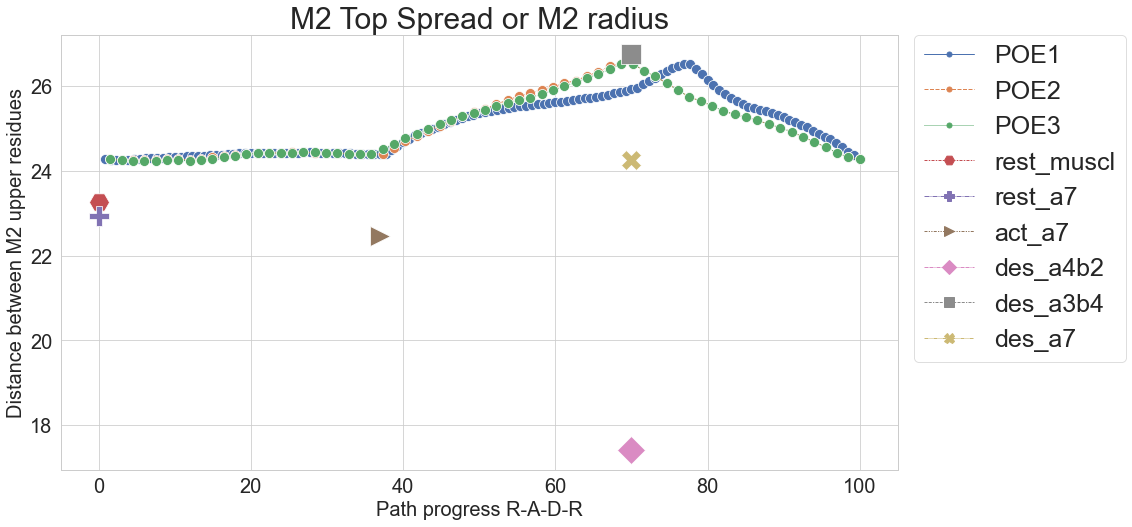

In [90]:
!./parse_results.sh POE1M2_topSpread.dat POE1
!./parse_results.sh POE2M2_topSpread.dat POE2
!./parse_results.sh POE3M2_topSpread.dat POE3

!cat POE1M2_topSpread.dat POE2M2_topSpread.dat POE3M2_topSpread.dat temps_M2-TOPSPREAD.dat > all_M2_topSpread.dat

POE_angle=pd.read_csv('all_M2_topSpread.dat', header=None, sep=' ')

POE_angle.columns =['Name', 'Torsion_angle', 'Path progress', 'DB']

sns.set(style="whitegrid", rc = {'figure.figsize':(15,8)})
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 20}                  
sns.set_context("paper", rc = paper_rc) 
fig = sns.lineplot(data=POE_angle, x="Path progress", y="Torsion_angle",
                   hue="DB",style="DB", markers=['.','.','.','H', 'P', '>','D','s','X'])

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0,markerscale=0.5,
          fontsize=25, title_fontsize=25)
fig.axes.set_title("M2 Top Spread or M2 radius",fontsize=30)
fig.set_xlabel("Path progress R-A-D-R",fontsize=20)
fig.set_ylabel("Distance between M2 upper residues",fontsize=20)
fig.tick_params(labelsize=20)

# M1-Kink

In [91]:
# controlled by the angle between the COM of Cα residues 200-204, 
# Cα COM of residues 202-206, and Cα COM for residues 205-216 
# (1 variable; reported as the negative of the change in angle from the O state average; 
# to represent a degree of kinking) (IN GLIC!)

# 200 201 202 203 204
# 202 203 204 205 206
# 205 206 207 208 209 210 211 213 314 215 216


# slide it find largest kink
# a4 216 217 218 219 220
# a4 218 219 220 221 222 
# a4 221 222 223 224 225 226 227 228 229 230 231

# b2 215 216 217 218 219 
# b2 217 218 219 220 221
# b2 220 221 222 223 224 225 226 227 228 229 230

# a5 215 216 217 218 219 
# a5 217 218 219 220 221 
# a5 220 221 222 223 224 225 226 227 228 229 230 

def get_angle(a,b,c):
    ba = a - b
    bc = c - b   
    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(cosine_angle)
    return np.degrees(angle)

def m1_kink(out_file, all_pdbs):
    for pdb in all_pdbs:

        ppdb = PandasPdb().read_pdb(pdb)
        df_pdb = ppdb.df['ATOM']
        pdb_name = pdb.split('/')[-1]

        M1_1_A4NA = df_pdb.loc[df_pdb['segment_id'] == 'A4NA'].query('216 <= residue_number <= 220')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
        M1_2_A4NA = df_pdb.loc[df_pdb['segment_id'] == 'A4NA'].query('218 <= residue_number <= 222')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
        M1_3_A4NA = df_pdb.loc[df_pdb['segment_id'] == 'A4NA'].query('221 <= residue_number <= 231')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
        A4NA_angle = get_angle(M1_1_A4NA,M1_2_A4NA,M1_3_A4NA)

        M1_1_A4ND = df_pdb.loc[df_pdb['segment_id'] == 'B2NB'].query('215 <= residue_number <= 219')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
        M1_2_A4ND = df_pdb.loc[df_pdb['segment_id'] == 'B2NB'].query('217 <= residue_number <= 221')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
        M1_3_A4ND = df_pdb.loc[df_pdb['segment_id'] == 'B2NB'].query('220 <= residue_number <= 230')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
        A4ND_angle = get_angle(M1_1_A4ND,M1_2_A4ND,M1_3_A4ND)

        M1_1_A5NC = df_pdb.loc[df_pdb['segment_id'] == 'A5NC'].query('215 <= residue_number <= 219')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
        M1_2_A5NC = df_pdb.loc[df_pdb['segment_id'] == 'A5NC'].query('217 <= residue_number <= 221')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
        M1_3_A5NC = df_pdb.loc[df_pdb['segment_id'] == 'A5NC'].query('220 <= residue_number <= 230')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
        A5NC_angle = get_angle(M1_1_A5NC,M1_2_A5NC,M1_3_A5NC)

        M1_1_B2NB = df_pdb.loc[df_pdb['segment_id'] == 'A4ND'].query('216 <= residue_number <= 220')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
        M1_2_B2NB = df_pdb.loc[df_pdb['segment_id'] == 'A4ND'].query('218 <= residue_number <= 222')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
        M1_3_B2NB = df_pdb.loc[df_pdb['segment_id'] == 'A4ND'].query('221 <= residue_number <= 231')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
        B2NB_angle = get_angle(M1_1_B2NB,M1_2_B2NB,M1_3_B2NB)

        M1_1_B2NE = df_pdb.loc[df_pdb['segment_id'] == 'B2NE'].query('215 <= residue_number <= 219')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
        M1_2_B2NE = df_pdb.loc[df_pdb['segment_id'] == 'B2NE'].query('217 <= residue_number <= 221')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
        M1_3_B2NE = df_pdb.loc[df_pdb['segment_id'] == 'B2NE'].query('220 <= residue_number <= 230')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
        B2NE_angle = get_angle(M1_1_B2NE,M1_2_B2NE,M1_3_B2NE)

        lis_dist = [A4NA_angle,
                    A4ND_angle,
                    A5NC_angle,
                    B2NB_angle,
                    B2NE_angle]

        average_dist = sum(lis_dist) / len(lis_dist)
        string = (pdb_name+" %f" % average_dist + '\n')
        print(string)
        out_file.write(string)

out_file = open("POE1M1_kink.dat", "w")
all_pdbs = all_pdbs = [str(_) for _ in pathlib.Path('/Users/marianagonzmed/Desktop/PATH_analysis/first_POE_path_analysis/CA_only/').glob('*.pdb')]
m1_kink(out_file, all_pdbs)
out_file.close()

out_file = open("POE2M1_kink.dat", "w")
all_pdbs = all_pdbs = [str(_) for _ in pathlib.Path('/Users/marianagonzmed/Desktop/PATH_analysis/second_POE_path_analysis/CA_only/').glob('*.pdb')]
m1_kink(out_file, all_pdbs)
out_file.close()

out_file = open("POE3M1_kink.dat", "w")
all_pdbs = all_pdbs = [str(_) for _ in pathlib.Path('/Users/marianagonzmed/Desktop/PATH_analysis/last_POE_path_analysis/CA_only/').glob('*.pdb')]
m1_kink(out_file, all_pdbs)
out_file.close()

out_file = open("temps_M1-KINK.dat", "w")

# 6uwz

# a1 217 218 219 220 221
# a1 219 220 221 222 223
# a1 222 223 224 225 226 227 228 229 230 231 232 

# d  231 232 233 234 235
# d  233 234 235 236 237
# d  236 237 238 239 240 241 242 243 244 245 246 

# b1 223 224 225 226 227
# b1 225 226 227 228 229
# b1 228 229 230 231 232 233 234 235 236 237 238 

# a1 217 218 219 220 221
# a1 219 220 221 222 223
# a1 222 223 224 225 226 227 228 229 230 231 232 

# g  226 227 228 229 230
# g  228 229 230 231 232
# g  231 232 233 234 235 236 237 238 239 240 241 

ppdb = PandasPdb().read_pdb(_6uwz_path)
df_pdb = ppdb.df['ATOM']

m1_a1 = df_pdb.loc[df_pdb['chain_id'] == 'A'].query('217 <= residue_number <= 221')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
m12_a1 = df_pdb.loc[df_pdb['chain_id'] == 'A'].query('219 <= residue_number <= 223')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
m123_a1 = df_pdb.loc[df_pdb['chain_id'] == 'A'].query('222 <= residue_number <= 232')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
a1_angle = get_angle(m1_a1,m12_a1,m123_a1)

m1_d = df_pdb.loc[df_pdb['chain_id'] == 'B'].query('231 <= residue_number <= 235')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
m12_d = df_pdb.loc[df_pdb['chain_id'] == 'B'].query('233 <= residue_number <= 237')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
m123_d = df_pdb.loc[df_pdb['chain_id'] == 'B'].query('236 <= residue_number <= 246')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
d_angle = get_angle(m1_d,m12_d,m123_d)

m1_b1 = df_pdb.loc[df_pdb['chain_id'] == 'C'].query('223 <= residue_number <= 227')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
m12_b1 = df_pdb.loc[df_pdb['chain_id'] == 'C'].query('225 <= residue_number <= 229')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
m123_b1 = df_pdb.loc[df_pdb['chain_id'] == 'C'].query('228 <= residue_number <= 238')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
b1_angle = get_angle(m1_b1,m12_b1,m123_b1)

m1_a12 = df_pdb.loc[df_pdb['chain_id'] == 'D'].query('217 <= residue_number <= 221')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
m12_a12 = df_pdb.loc[df_pdb['chain_id'] == 'D'].query('219 <= residue_number <= 223')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
m123_a12 = df_pdb.loc[df_pdb['chain_id'] == 'D'].query('222 <= residue_number <= 232')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
a12_angle = get_angle(m1_a12,m12_a12,m123_a12)

m1_g = df_pdb.loc[df_pdb['chain_id'] == 'E'].query('226 <= residue_number <= 230')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
m12_g = df_pdb.loc[df_pdb['chain_id'] == 'E'].query('228 <= residue_number <= 232')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
m123_g = df_pdb.loc[df_pdb['chain_id'] == 'E'].query('231 <= residue_number <= 241')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
g_angle = get_angle(m1_g,m12_g,m123_g)

lis_dist = [a1_angle, d_angle, b1_angle, a12_angle, g_angle]
average_dist = sum(lis_dist) / len(lis_dist)
    
pdb_name = _6uwz_path.split('/')[-1]
string = (pdb_name+" %f" % average_dist + '\n')
print(string)
out_file.write(string)


#5kxi

# A4 223 224 225 226 227
# A4 225 226 227 228 229
# A4 228 229 230 231 232 233 234 235 236 237 238 239

# B2 215 216 217 218 219
# B2 217 218 219 220 221
# B2 220 221 222 223 224 225 226 227 228 229 230 231

# B2 215 216 217 218 219
# B2 217 218 219 220 221
# B2 220 221 222 223 224 225 226 227 228 229 230 231

# A4 223 224 225 226 227
# A4 225 226 227 228 229
# A4 228 229 230 231 232 233 234 235 236 237 238 239

# B2 215 216 217 218 219
# B2 217 218 219 220 221
# B2 220 221 222 223 224 225 226 227 228 229 230 231

ppdb = PandasPdb().read_pdb(_5kxi_path)
df_pdb = ppdb.df['ATOM']

ppdb_tmd = PandasPdb().read_pdb(TMD_5kxi_path)
tmd_mean = ppdb_tmd.df['ATOM'][['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()

m1_a4 = df_pdb.loc[df_pdb['chain_id'] == 'A'].query('223 <= residue_number <= 227')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
m12_a4 = df_pdb.loc[df_pdb['chain_id'] == 'A'].query('225 <= residue_number <= 229')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
m123_a4 = df_pdb.loc[df_pdb['chain_id'] == 'A'].query('228 <= residue_number <= 239')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
a4b2_angle = get_angle(m1_a4,m12_a4,m123_a4)                                                

m1_b2 = df_pdb.loc[df_pdb['chain_id'] == 'C'].query('215 <= residue_number <= 219')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
m12_b2 = df_pdb.loc[df_pdb['chain_id'] == 'C'].query('217 <= residue_number <= 221')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
m123_b2 = df_pdb.loc[df_pdb['chain_id'] == 'C'].query('220 <= residue_number <= 231')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
b2b22_angle = get_angle(m1_b2,m12_b2,m123_b2)

m1_b22 = df_pdb.loc[df_pdb['chain_id'] == 'E'].query('215 <= residue_number <= 219')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
m12_b22 = df_pdb.loc[df_pdb['chain_id'] == 'E'].query('217 <= residue_number <= 221')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
m123_b22 = df_pdb.loc[df_pdb['chain_id'] == 'E'].query('220 <= residue_number <= 231')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
b22b42_angle = get_angle(m1_b22,m12_b22,m123_b22)

m1_a42 = df_pdb.loc[df_pdb['chain_id'] == 'G'].query('223 <= residue_number <= 227')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
m12_a42 = df_pdb.loc[df_pdb['chain_id'] == 'G'].query('225 <= residue_number <= 229')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
m123_a42 = df_pdb.loc[df_pdb['chain_id'] == 'G'].query('228 <= residue_number <= 239')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
a42b23_angle = get_angle(m1_a42,m12_a42,m123_a42)

m1_b23 = df_pdb.loc[df_pdb['chain_id'] == 'I'].query('215 <= residue_number <= 219')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
m12_b23 = df_pdb.loc[df_pdb['chain_id'] == 'I'].query('217 <= residue_number <= 221')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
m123_b23 = df_pdb.loc[df_pdb['chain_id'] == 'I'].query('220 <= residue_number <= 231')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
b23a4_angle = get_angle(m1_b23,m12_b23,m123_b23)

lis_dist = [a4b2_angle, b2b22_angle, b22b42_angle, a42b23_angle, b23a4_angle]
average_dist = sum(lis_dist) / len(lis_dist)
    
pdb_name = _5kxi_path.split('/')[-1]
string = (pdb_name+" %f" % average_dist + '\n')
print(string)
out_file.write(string)

# 6PV7

# A3 216 217 218 219 220
# A3 218 219 220 221 222
# A3 221 222 223 224 225 226 227 228 229 230 231 

# B4 217 218 219 220 221
# B4 219 220 221 222 223
# B4 222 223 224 225 226 227 228 229 230 231 232

# B4 217 218 219 220 221
# B4 219 220 221 222 223
# B4 222 223 224 225 226 227 228 229 230 231 232

# A3 216 217 218 219 220
# A3 218 219 220 221 222
# A3 221 222 223 224 225 226 227 228 229 230 231 

# B4 217 218 219 220 221
# B4 219 220 221 222 223
# B4 222 223 224 225 226 227 228 229 230 231 232

ppdb = PandasPdb().read_pdb(_6pv7_path)
df_pdb = ppdb.df['ATOM']

m1_a3 = df_pdb.loc[df_pdb['chain_id'] == 'A'].query('216 <= residue_number <= 220')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
m12_a3 = df_pdb.loc[df_pdb['chain_id'] == 'A'].query('218 <= residue_number <= 222')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
m123_a3 = df_pdb.loc[df_pdb['chain_id'] == 'A'].query('221 <= residue_number <= 231')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
a3_angle = get_angle(m1_a3,m12_a3,m123_a3)

m1_b4 = df_pdb.loc[df_pdb['chain_id'] == 'C'].query('217 <= residue_number <= 221')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
m12_b4 = df_pdb.loc[df_pdb['chain_id'] == 'C'].query('219 <= residue_number <= 223')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
m123_b4 = df_pdb.loc[df_pdb['chain_id'] == 'C'].query('222 <= residue_number <= 232')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
b4_angle = get_angle(m1_b4,m12_b4,m123_b4)

m1_b42 = df_pdb.loc[df_pdb['chain_id'] == 'E'].query('217 <= residue_number <= 221')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
m12_b42 = df_pdb.loc[df_pdb['chain_id'] == 'E'].query('219 <= residue_number <= 223')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
m123_b42 = df_pdb.loc[df_pdb['chain_id'] == 'E'].query('222 <= residue_number <= 232')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
b42_angle = get_angle(m1_b42,m12_b42,m123_b42)

m1_a32 = df_pdb.loc[df_pdb['chain_id'] == 'G'].query('216 <= residue_number <= 220')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
m12_a32 = df_pdb.loc[df_pdb['chain_id'] == 'G'].query('218 <= residue_number <= 222')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
m123_a32 = df_pdb.loc[df_pdb['chain_id'] == 'G'].query('221 <= residue_number <= 231')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
a32_angle = get_angle(m1_a32,m12_a32,m123_a32)

m1_b43 = df_pdb.loc[df_pdb['chain_id'] == 'I'].query('217 <= residue_number <= 221')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
m12_b43 = df_pdb.loc[df_pdb['chain_id'] == 'I'].query('218 <= residue_number <= 222')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
m123_b43 = df_pdb.loc[df_pdb['chain_id'] == 'I'].query('221 <= residue_number <= 231')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
b43_angle = get_angle(m1_b43,m12_b43,m123_b43)

lis_dist = [a3_angle, b4_angle, b42_angle, a32_angle, b43_angle]
average_dist = sum(lis_dist) / len(lis_dist)
    
pdb_name = _6pv7_path.split('/')[-1]
string = (pdb_name+" %f" % average_dist + '\n')
print(string)
out_file.write(string)

#A7  212 213 214 215 216
#A7  214 215 216 217 218
#A7  217 218 219 220 221 222 223 224 225 226 227 228

for pdb in paths:
    
    pdb_name = pdb.split('/')[-1]
    
    ppdb = PandasPdb().read_pdb(pdb)
    df_pdb = ppdb.df['ATOM']
    
    loop1_A4NA = df_pdb.loc[df_pdb['chain_id'] == 'A'].query('212 <= residue_number <= 216')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
    loop2_A4NA = df_pdb.loc[df_pdb['chain_id'] == 'A'].query('214 <= residue_number <= 218')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
    loop3_A4NA = df_pdb.loc[df_pdb['chain_id'] == 'A'].query('217 <= residue_number <= 228')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
    a1_angle = get_angle(loop1_A4NA,loop2_A4NA,loop3_A4NA)

    loop1_A4ND = df_pdb.loc[df_pdb['chain_id'] == 'B'].query('212 <= residue_number <= 216')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
    loop2_A4ND = df_pdb.loc[df_pdb['chain_id'] == 'B'].query('214 <= residue_number <= 218')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
    loop3_A4ND = df_pdb.loc[df_pdb['chain_id'] == 'B'].query('217 <= residue_number <= 228')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
    a2_angle = get_angle(loop1_A4ND,loop2_A4ND,loop3_A4ND)

    loop1_A5NC = df_pdb.loc[df_pdb['chain_id'] == 'C'].query('212 <= residue_number <= 216')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
    loop2_A5NC = df_pdb.loc[df_pdb['chain_id'] == 'C'].query('214 <= residue_number <= 218')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
    loop3_A5NC = df_pdb.loc[df_pdb['chain_id'] == 'C'].query('217 <= residue_number <= 228')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
    a3_angle = get_angle(loop1_A5NC,loop2_A5NC,loop3_A5NC)

    loop1_B2NB = df_pdb.loc[df_pdb['chain_id'] == 'D'].query('212 <= residue_number <= 216')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
    loop2_B2NB = df_pdb.loc[df_pdb['chain_id'] == 'D'].query('214 <= residue_number <= 218')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
    loop3_B2NB = df_pdb.loc[df_pdb['chain_id'] == 'D'].query('217 <= residue_number <= 228')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
    a4_angle = get_angle(loop1_B2NB,loop2_B2NB,loop3_B2NB)

    loop1_B2NE = df_pdb.loc[df_pdb['chain_id'] == 'E'].query('212 <= residue_number <= 216')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
    loop2_B2NE = df_pdb.loc[df_pdb['chain_id'] == 'E'].query('214 <= residue_number <= 218')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
    loop3_B2NE = df_pdb.loc[df_pdb['chain_id'] == 'E'].query('217 <= residue_number <= 228')[['x_coord','y_coord','z_coord']].mean(axis=0).to_numpy()
    a5_angle = get_angle(loop1_B2NE,loop2_B2NE,loop3_B2NE)

    lis_dist = [a1_angle,a2_angle,a3_angle,a4_angle,a5_angle]
    average_dist = sum(lis_dist) / len(lis_dist)
    
    pdb_name = pdb.split('/')[-1]
    string = (pdb_name+" %f" % average_dist + '\n')
    print(string)
    out_file.write(string)

out_file.close()

trj1_001_CA.pdb 152.647883

trj1_002_CA.pdb 152.848693

trj1_003_CA.pdb 153.054057

trj1_004_CA.pdb 153.288123

trj1_005_CA.pdb 153.441358

trj1_006_CA.pdb 153.511465

trj1_007_CA.pdb 153.522090

trj1_008_CA.pdb 153.489771

trj1_009_CA.pdb 153.370791

trj1_010_CA.pdb 153.296074

trj1_011_CA.pdb 153.250729

trj1_012_CA.pdb 153.247826

trj1_013_CA.pdb 153.239171

trj1_014_CA.pdb 153.244013

trj1_015_CA.pdb 153.234505

trj1_016_CA.pdb 153.210295

trj1_017_CA.pdb 153.214032

trj1_018_CA.pdb 153.217445

trj1_019_CA.pdb 153.198864

trj1_020_CA.pdb 153.153060

trj1_021_CA.pdb 153.069272

trj1_022_CA.pdb 153.060552

trj1_023_CA.pdb 153.098609

trj1_024_CA.pdb 153.166034

trj1_025_CA.pdb 153.241985

trj1_026_CA.pdb 153.272501

trj1_027_CA.pdb 153.296404

trj1_028_CA.pdb 153.281878

trj1_029_CA.pdb 153.219124

trj1_030_CA.pdb 153.146916

trj1_031_CA.pdb 153.103168

trj1_032_CA.pdb 153.093461

trj1_033_CA.pdb 153.181824

trj1_034_CA.pdb 153.219293

trj1_035_CA.pdb 153.315212

trj1_036_CA.pdb 153.

130
67
67


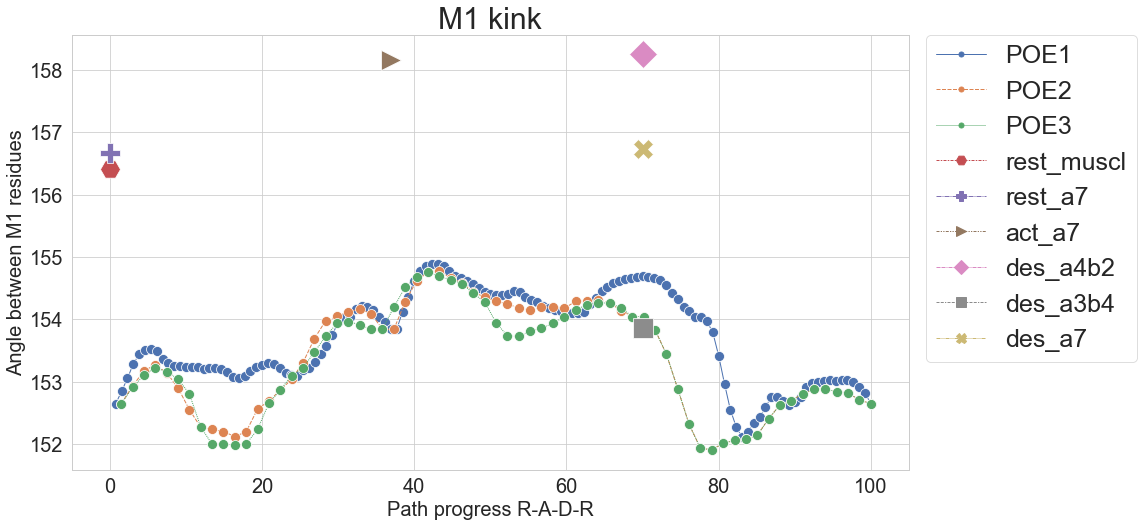

In [92]:
!./parse_results.sh POE1M1_kink.dat POE1
!./parse_results.sh POE2M1_kink.dat POE2
!./parse_results.sh POE3M1_kink.dat POE3

!cat POE1M1_kink.dat POE2M1_kink.dat POE3M1_kink.dat temps_M1-KINK.dat > all_M1_kink.dat


POE_angle=pd.read_csv('all_M1_kink.dat', header=None, sep=' ')

POE_angle.columns =['Name', 'Torsion_angle', 'Path progress', 'DB']

sns.set(style="whitegrid", rc = {'figure.figsize':(15,8)})
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 20}                  
sns.set_context("paper", rc = paper_rc) 
fig = sns.lineplot(data=POE_angle, x="Path progress", y="Torsion_angle",
                   hue="DB",style="DB", markers=['.','.','.','H', 'P', '>','D','s','X'])

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0,markerscale=0.5,
          fontsize=25, title_fontsize=25)
fig.axes.set_title("M1 kink",fontsize=30)
fig.set_xlabel("Path progress R-A-D-R",fontsize=20)
fig.set_ylabel("Angle between M1 residues",fontsize=20)
fig.tick_params(labelsize=20)

In [10]:
path = '/Users/marianagonzmed/Desktop/keys_smi_lengths.dat'
cap_smi_len = pd.read_csv(path)

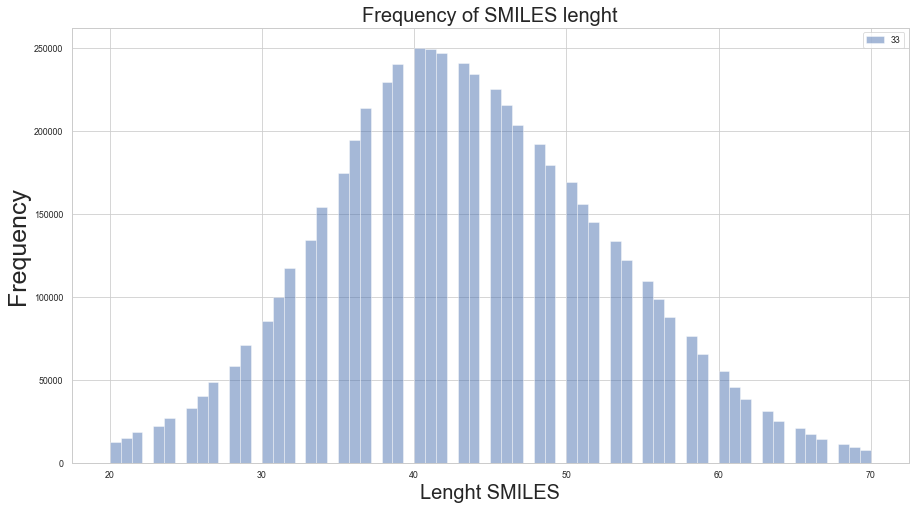

In [22]:
ax = cap_smi_len.plot.hist(bins=70, alpha=0.5)
plt.xlabel('Lenght SMILES',fontsize=20)
plt.ylabel('Frequency', fontsize=25)
ax.set_title("Frequency of SMILES lenght",fontsize=20)
plt.savefig('/Users/marianagonzmed/Desktop/lentgh_frequ.png',bbox_inches='tight')

In [23]:
import torch


def normVoid_tensor(input_tensor):
    # normalize
    input_tensor /= input_tensor.sum(axis = 1).max()
    # add void dimension
    input_tensor = torch.cat((input_tensor, (1 - input_tensor.sum(dim = 1).unsqueeze(1))), axis=1)
    # clamp values
    input_tensor = torch.clamp(input_tensor, min=0, max=1)
    # normalize again adds to one
    input_tensor /= input_tensor.sum(axis = 1).unsqueeze(1)
    return input_tensor

AttributeError: module 'dill' has no attribute 'extend'